## 1. Descripción del problema

En este proyecto se aborda la tarea de **clasificación supervisada de textos** para la detección de *ciberacoso (cyberbullying)* en redes sociales. El objetivo es construir modelos capaces de identificar automáticamente si un mensaje contiene contenido ofensivo, lenguaje abusivo o comportamientos asociados al ciberacoso.

El ciberacoso es un problema social creciente que afecta a personas de diferentes edades y contextos, y que puede generar consecuencias psicológicas graves. La automatización de su detección permite apoyar sistemas de moderación de contenido, proteger a comunidades vulnerables y reducir la propagación de violencia digital.

Para este trabajo se utiliza el dataset **Cyberbullying Detection Dataset**, disponible públicamente en Kaggle:

**Fuente del dataset:**  
Peesara, S. (2022). *Cyberbullying Detection Dataset*. Kaggle.  
Disponible en: https://www.kaggle.com/datasets/sandhyapeesara/cyberbullying-detection-dataset

Este conjunto de datos contiene diferentes tipos de textos extraídos de redes sociales y clasificados en varias categorías que representan tanto comportamientos de ciberacoso como mensajes neutros. Está compuesto principalmente por las siguientes columnas:

- **`tweet_text`**: texto del mensaje.
- **`cyberbullying_type`**: etiqueta asignada por anotadores humanos.  
  Las categorías incluyen:
  - *not_cyberbullying*  
  - *age*  
  - *religion*  
  - *ethnicity*  
  - *gender*  
  - *other_cyberbullying*

Cada una de estas categorías representa un tipo de mensaje abusivo basado en distintas formas de discriminación. Para efectos del análisis en este proyecto, esta variable se trabaja como la **etiqueta (target)** del problema de clasificación.

**Objetivo del trabajo:**  
El objetivo principal es entrenar, ajustar y comparar diferentes modelos de aprendizaje supervisado —incluyendo regresión multivariada, árbol de decisión, Random Forest, MLP y una red neuronal profunda (DNN)— con el fin de determinar cuál de ellos ofrece el mejor rendimiento para la detección automática de ciberacoso en los textos del dataset.

Para lograrlo, se realiza un proceso completo que incluye:

1. Inspección visual y estadística del dataset.  
2. Preprocesamiento de texto (limpieza, normalización, lematización, etc.).  
3. Representación vectorial mediante métodos como TF-IDF.  
4. Entrenamiento y ajuste de modelos con **GridSearchCV** y validación cruzada.  
5. Evaluación basada en métricas como accuracy, precisión, recall, F1-score y matrices de confusión.  
6. Análisis comparativo de resultados y discusión final.

Este estudio permite evaluar qué tan efectivos son los modelos tradicionales de machine learning y las redes neuronales para abordar el desafío real de detectar ciberacoso en lenguaje natural.

https://github.com/AnaKarina15/Aprendizaje-de-maquinas-supervisado.git

#Descarga de librerias a usar

In [ ]:
!pip install emoji
!pip install contractions
!pip install pyspellchecker
!pip install symspellpy
!pip install nltk
!pip install spacy
!pip install Unidecode
!pip install seaborn
!pip install wordcloud
!pip install scikit-learn
!pip install scikeras tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.4/608.4 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.1/345.1 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 57.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.6/159.6 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.8/235.8 kB 6.1 MB/s eta 0:00:00


#Importacion de librerias

In [ ]:
import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import spacy
import string
from collections import Counter
import emoji
import matplotlib.pyplot as plt
import contractions
from spellchecker import SpellChecker
from nltk import pos_tag
from symspellpy import SymSpell, Verbosity
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
import requests
from tempfile import TemporaryDirectory
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint
import time
from sklearn.metrics import confusion_matrix

# Generacion del dataset en el archivo


In [ ]:
import gdown
url = "https://drive.google.com/uc?export=download&id=1dkVjE4EPY5rdMHV_K3PApsHNkDPpjguG"
output = "Cyber_Bully_Data.json"
gdown.download(url, output, quiet=False)

df = pd.read_json(output, lines=True)
print(df.head())

Downloading...
From: https://drive.google.com/uc?export=download&id=1dkVjE4EPY5rdMHV_K3PApsHNkDPpjguG
To: /content/Cyber_Bully_Data.json
100%|██████████| 17.6M/17.6M [00:00<00:00, 119MB/s]


                                                text              label
0  @ZubearSays Any real nigga isn't letting this ...     ethnicity/race
1  @MoradoSkittle @prolifejewess @DAConsult @Kell...  not_cyberbullying
2        the only thing i wish, i wish a nigga would     ethnicity/race
3  You saudias are not friends of Muslim idiots c...           religion
4  @JaydenT2399 @TractorLaw @holmes_gael @erconge...           religion


#Mostramos las primeras 20 lineas del dataframe




In [ ]:
df.head(20)

,text,label
0,@ZubearSays Any real nigga isn't letting this ...,ethnicity/race
1,@MoradoSkittle @prolifejewess @DAConsult @Kell...,not_cyberbullying
2,"the only thing i wish, i wish a nigga would",ethnicity/race
3,You saudias are not friends of Muslim idiots c...,religion
4,@JaydenT2399 @TractorLaw @holmes_gael @erconge...,religion
5,@areyalldizzy @soobroll wait its so bad………. th...,ethnicity/race
6,A voting machine error in New Jersey flipped t...,not_cyberbullying
7,"@Leeo2680 @KeaweWong Now in President Jokowi, ...",religion
8,@NaTuRaLbeautyME @Phil_Lewis_ Agreed @NaTuRaLb...,ethnicity/race
9,"Linked in an email, 'Sarah, you're on a roll w...",not_cyberbullying


#Contamos los datos de cada etiqueta

In [ ]:
print(df['label'].value_counts())

label
not_cyberbullying    50000
ethnicity/race       17000
gender/sexual        17000
religion             15990
Name: count, dtype: int64


#Revisamos si hay datos faltantes

In [ ]:
df.isna().sum()

,0
text,0
label,0


#Ahora visualizamos los datos por etiqueta

<Axes: xlabel='label'>

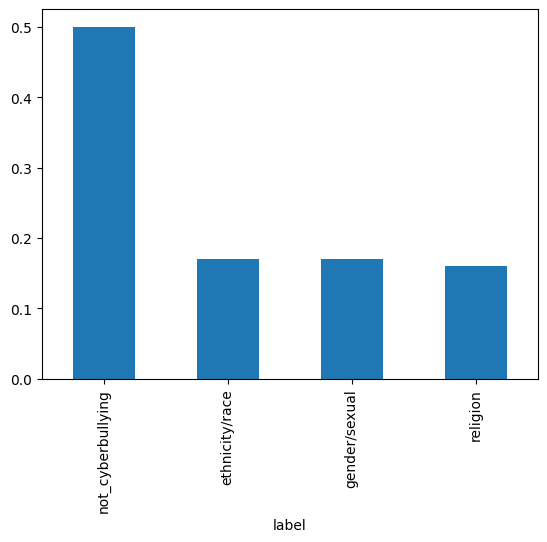

In [ ]:
df['label'].value_counts(normalize=True).plot.bar()


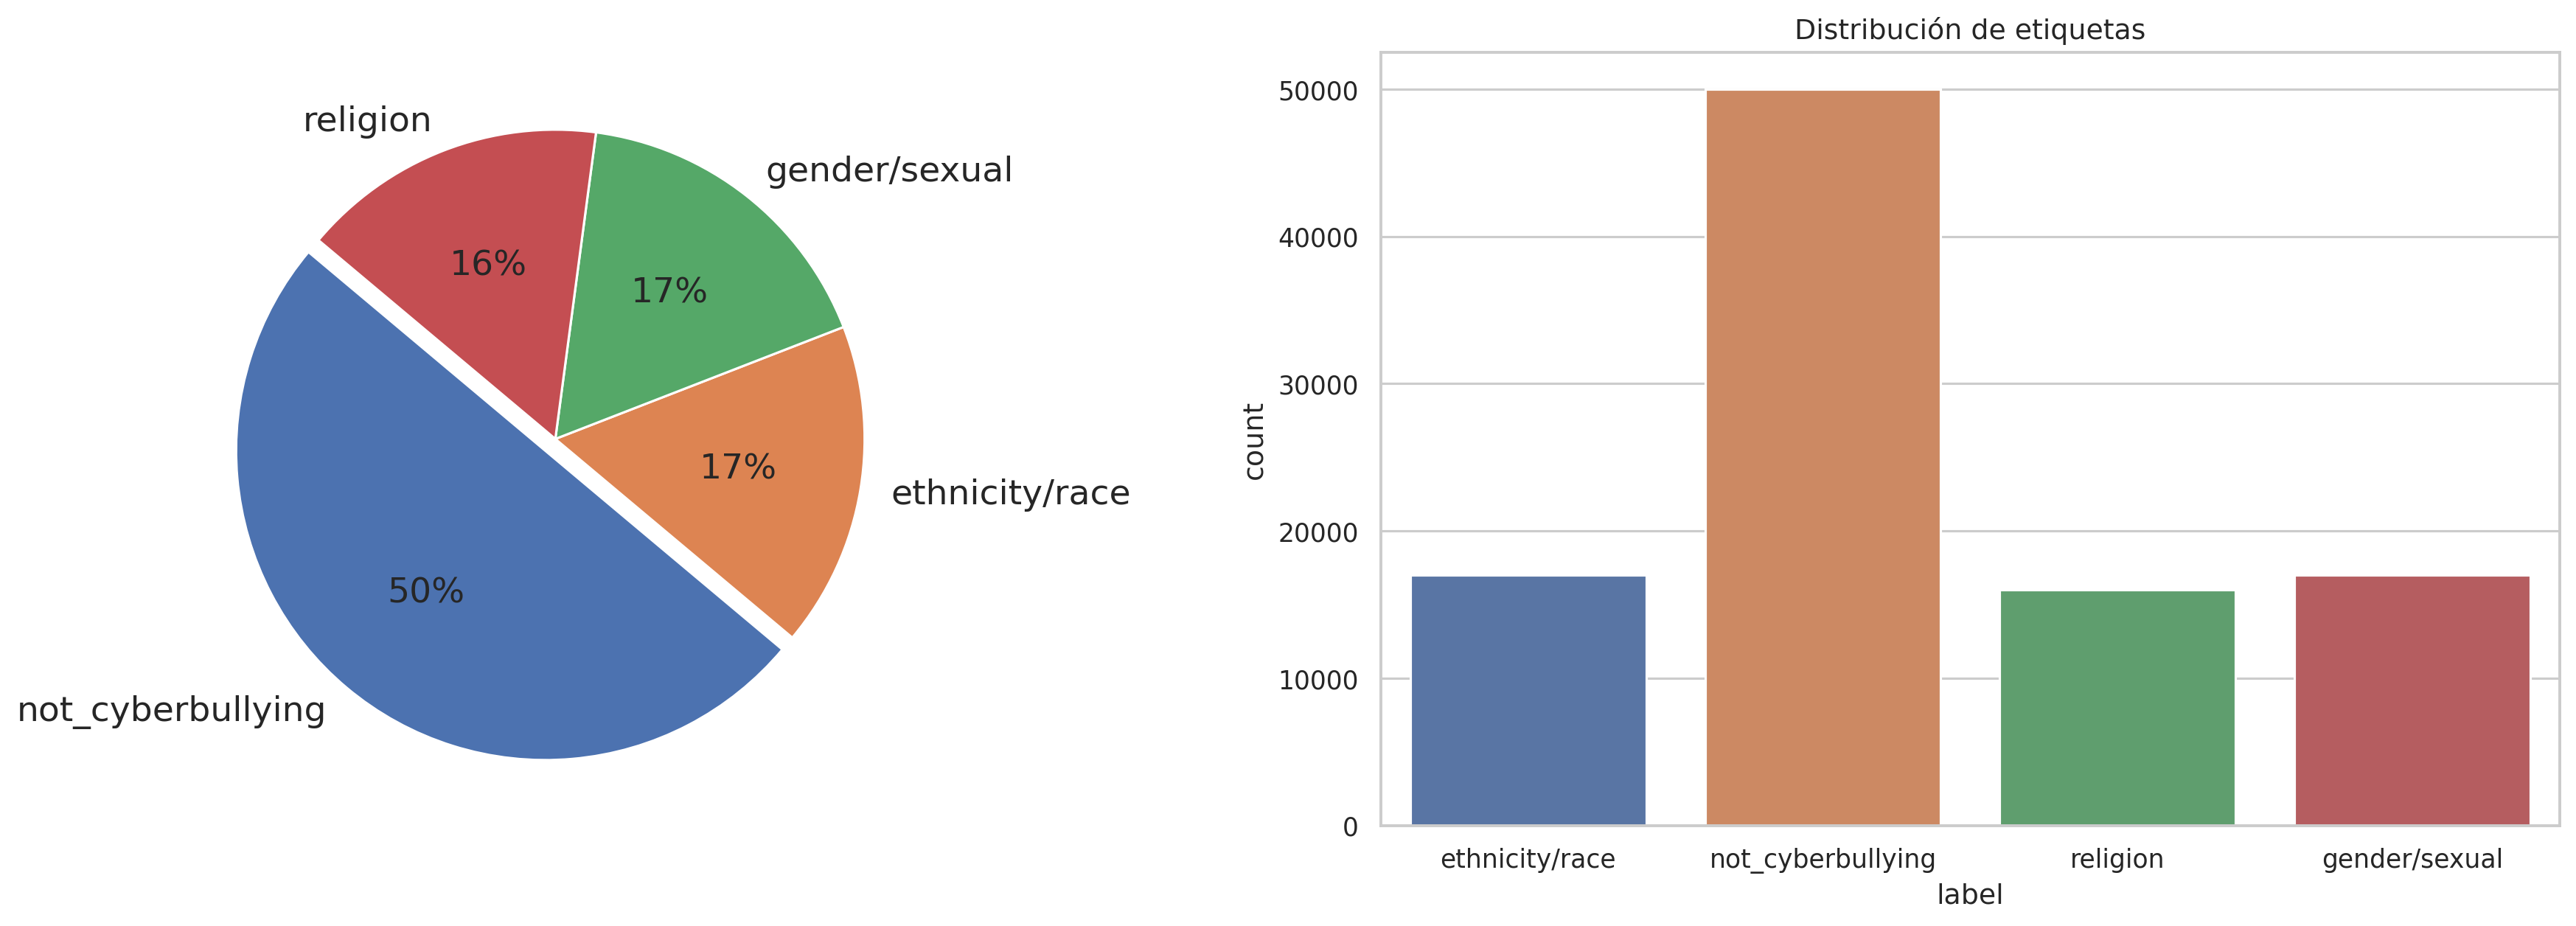

In [ ]:

# Contamos las etiquetas
counts = df['label'].value_counts()
labels = counts.index          # nombres de las clases (por ejemplo: spam, ham)
dist = counts.to_numpy()       # valores numéricos (frecuencias)

sns.set(style="whitegrid")

plt.figure(figsize=(20, 6), dpi=227)

# --- Primer gráfico: gráfico de pastel ---
plt.subplot(1, 2, 1)
plt.pie(
    dist,
    labels=labels,
    textprops={'fontsize': 15},
    startangle=140,
    autopct='%1.0f%%',
    explode=[0.05, 0, 0, 0]  # Corrected: Must be of length 'x', not 2
)

# --- Segundo gráfico: gráfico de barras ---
plt.subplot(1, 2, 2)
sns.countplot(data=df, x="label", hue="label")
plt.title("Distribución de etiquetas")

plt.show()

/tmp/ipython-input-1009534398.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


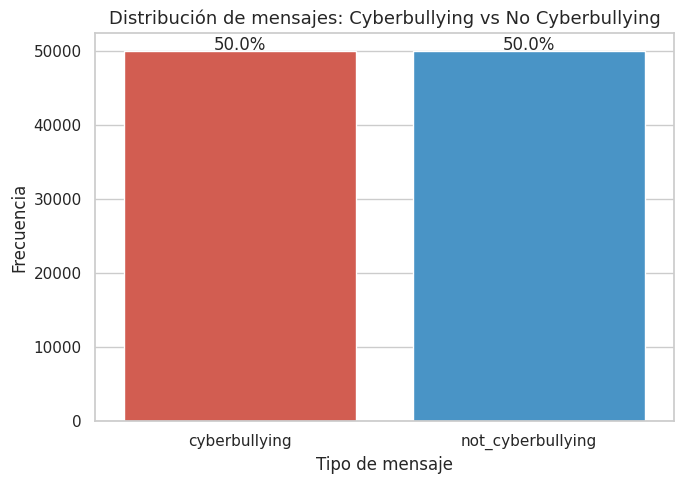

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear columna agrupada (si aún no la tienes)
df['bullying_group'] = df['label'].apply(
    lambda x: 'cyberbullying' if x != 'not_cyberbullying' else 'not_cyberbullying'
)

# --- Gráfico de barras ---
sns.set(style="whitegrid")

plt.figure(figsize=(7, 5))
sns.countplot(
    data=df,
    x='bullying_group',
    order=['cyberbullying', 'not_cyberbullying'],
    palette=['#E74C3C', '#3498DB']
)

plt.title("Distribución de mensajes: Cyberbullying vs No Cyberbullying", fontsize=13)
plt.xlabel("Tipo de mensaje")
plt.ylabel("Frecuencia")

# Mostrar porcentajes arriba de las barras
total = len(df)
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(
        p.get_x() + p.get_width()/2,
        height + total*0.002,
        f'{(height/total)*100:.1f}%',
        ha='center'
    )

plt.tight_layout()
plt.show()


## 2. Inspección y exploración del conjunto de datos

Para comprender mejor la naturaleza del dataset y orientar las decisiones de preprocesamiento y modelado, se realizó una exploración visual y estadística de las variables principales.

### 2.1 Visualización inicial de los datos

Se inspeccionaron las primeras filas del dataset mediante `df.head()`, lo que permitió confirmar que la estructura del conjunto de datos es consistente con la documentación del repositorio. El dataset contiene dos columnas principales:

- **tweet_text**: texto del mensaje publicado en redes sociales.
- **cyberbullying_type**: categoría asignada al mensaje según el tipo de ciberacoso o ausencia del mismo.

La función `df.info()` mostró que no existen valores nulos en las columnas principales, lo que significa que el dataset puede utilizarse sin necesidad de imputación o eliminación adicional por ausencia de datos. También se verificó que no existían registros duplicados o inconsistencias estructurales.

### 2.2 Distribución de la variable objetivo

Con el fin de analizar la cantidad de ejemplos disponibles por categoría, se generaron gráficos de barras y gráficos circulares sobre la columna `cyberbullying_type`. Estos gráficos permiten evaluar si el dataset se encuentra balanceado o si existen clases mayoritarias/minoritarias que puedan afectar el entrenamiento de los modelos.

A partir de estas visualizaciones se observa que:

- La clase **not_cyberbullying** es claramente la más frecuente.
- Las clases **age**, **ethnicity**, **religion**, **gender** y **other_cyberbullying** contienen menos ejemplos que la clase mayoritaria.
- Esto implica que el dataset presenta un **desbalance de clases**, lo cual debe ser considerado más adelante en el entrenamiento de los modelos (por ejemplo, mediante pesos de clase o técnicas de balanceo).

Este análisis es fundamental, ya que los modelos podrían sesgarse hacia la clase dominante si el desbalance no se trata adecuadamente.

### 2.3 Análisis de longitud de los textos

Para comprender la estructura de los mensajes, se calculó la longitud de cada texto (número de palabras o caracteres) y se generó un histograma. En este análisis se observa que:

- La mayoría de los mensajes tienen una longitud relativamente corta, típica de publicaciones en redes sociales.
- Existen algunos mensajes más largos que pueden considerarse outliers.
- Esto sugiere que es necesario aplicar una vectorización que maneje adecuadamente textos cortos, como TF-IDF o embeddings compactos.

Conocer la longitud del texto también ayuda a entender si será necesario aplicar truncamiento o padding en modelos neuronales.

### 2.4 WordCloud y análisis semántico inicial

Como parte de la exploración del contenido, se generó una **nube de palabras (WordCloud)** utilizando todos los textos. Esta visualización permite identificar términos frecuentes que aparecen en los mensajes.

En la WordCloud se observan palabras relacionadas con lenguaje cotidiano de redes sociales, así como algunos términos sensibles que suelen aparecer en mensajes discriminatorios. Esto confirma la presencia de vocabulario relevante para la detección de ciberacoso.

También se puede generar una WordCloud por cada categoría para visualizar diferencias semánticas entre clases, lo cual es especialmente útil en tareas multicategoría como esta.

### 2.5 Conclusiones de la inspección inicial

La exploración inicial del dataset permite concluir lo siguiente:

- El dataset está completo, no contiene valores nulos y está listo para preprocesamiento.
- La variable objetivo presenta **desbalance significativo**, lo que afectará el entrenamiento si no se aplican estrategias adecuadas.
- Los textos son relativamente cortos, coherentes con el dominio de redes sociales.
- El vocabulario incluye expresiones sensibles que justifican técnicas de normalización, limpieza, lematización y vectorización adecuadas.

Los resultados de esta inspección guían las decisiones de la siguiente sección, donde se detalla el preprocesamiento aplicado a los textos.


#Preprocesamiento

##Creamos un nuevo data frame

In [ ]:
text_df = df[['text']]

#Lowercasing

Lowercasing: Conversión de mayuscula a minuscula

In [ ]:
text_df['text_lower'] = text_df['text'].str.lower()
text_df[['text','text_lower']].head()

/tmp/ipython-input-2579880952.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df['text_lower'] = text_df['text'].str.lower()


,text,text_lower
0,@ZubearSays Any real nigga isn't letting this ...,@zubearsays any real nigga isn't letting this ...
1,@MoradoSkittle @prolifejewess @DAConsult @Kell...,@moradoskittle @prolifejewess @daconsult @kell...
2,"the only thing i wish, i wish a nigga would","the only thing i wish, i wish a nigga would"
3,You saudias are not friends of Muslim idiots c...,you saudias are not friends of muslim idiots c...
4,@JaydenT2399 @TractorLaw @holmes_gael @erconge...,@jaydent2399 @tractorlaw @holmes_gael @erconge...


#Removemos las URL

In [ ]:
def remove_urls(text):
  url_pattern = re.compile(r'https?://\S+|www\.\S+')
  return url_pattern.sub(r'', text)

text_df['text_wo_urls'] = text_df['text'].apply(lambda text: remove_urls(text))
text_df[['text', 'text_wo_urls']].head()

,text,text_wo_urls
0,@ZubearSays Any real nigga isn't letting this ...,@ZubearSays Any real nigga isn't letting this ...
1,@MoradoSkittle @prolifejewess @DAConsult @Kell...,@MoradoSkittle @prolifejewess @DAConsult @Kell...
2,"the only thing i wish, i wish a nigga would","the only thing i wish, i wish a nigga would"
3,You saudias are not friends of Muslim idiots c...,You saudias are not friends of Muslim idiots c...
4,@JaydenT2399 @TractorLaw @holmes_gael @erconge...,@JaydenT2399 @TractorLaw @holmes_gael @erconge...


#Pasamos de emoji a texto

In [ ]:
def emoji_to_text(text):
    return emoji.demojize(text)

text_df['text_emojis'] = text_df['text'].apply(emoji_to_text)
text_df[['text', 'text_emojis']].head()

,text,text_emojis
0,@ZubearSays Any real nigga isn't letting this ...,@ZubearSays Any real nigga isn't letting this ...
1,@MoradoSkittle @prolifejewess @DAConsult @Kell...,@MoradoSkittle @prolifejewess @DAConsult @Kell...
2,"the only thing i wish, i wish a nigga would","the only thing i wish, i wish a nigga would"
3,You saudias are not friends of Muslim idiots c...,You saudias are not friends of Muslim idiots c...
4,@JaydenT2399 @TractorLaw @holmes_gael @erconge...,@JaydenT2399 @TractorLaw @holmes_gael @erconge...


#Remover menciones

In [ ]:
def remove_mentions(text):
  return re.sub(r'@\w+', '', text)

text_df['text_wo_mentions'] = text_df['text'].apply(lambda text: remove_mentions(text))
text_df[['text', 'text_wo_mentions']].head()

,text,text_wo_mentions
0,@ZubearSays Any real nigga isn't letting this ...,Any real nigga isn't letting this happen.
1,@MoradoSkittle @prolifejewess @DAConsult @Kell...,"I didn't even mention Mexico, but the US..."
2,"the only thing i wish, i wish a nigga would","the only thing i wish, i wish a nigga would"
3,You saudias are not friends of Muslim idiots c...,You saudias are not friends of Muslim idiots c...
4,@JaydenT2399 @TractorLaw @holmes_gael @erconge...,And yet the MAGA want to do just that. Th...


#Removemos la puntuación

In [ ]:
def remove_punctuation(text):
  return text.translate(str.maketrans('', '', string.punctuation))

text_df['text_wo_punct'] = text_df['text'].apply(lambda text: remove_punctuation(text))
text_df[['text', 'text_wo_punct']].head()

,text,text_wo_punct
0,@ZubearSays Any real nigga isn't letting this ...,ZubearSays Any real nigga isnt letting this ha...
1,@MoradoSkittle @prolifejewess @DAConsult @Kell...,MoradoSkittle prolifejewess DAConsult KellyYod...
2,"the only thing i wish, i wish a nigga would",the only thing i wish i wish a nigga would
3,You saudias are not friends of Muslim idiots c...,You saudias are not friends of Muslim idiots c...
4,@JaydenT2399 @TractorLaw @holmes_gael @erconge...,JaydenT2399 TractorLaw holmesgael erconger Acy...


#Removemos las stopwords

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
  return " ".join(word for word in str(text).split() if word not in STOPWORDS)

text_df['text_wo_stop'] = text_df['text'].apply(lambda text: remove_stopwords(text))
text_df[['text', 'text_wo_stop']].head()

,text,text_wo_stop
0,@ZubearSays Any real nigga isn't letting this ...,@ZubearSays Any real nigga letting happen.
1,@MoradoSkittle @prolifejewess @DAConsult @Kell...,@MoradoSkittle @prolifejewess @DAConsult @Kell...
2,"the only thing i wish, i wish a nigga would","thing wish, wish nigga would"
3,You saudias are not friends of Muslim idiots c...,You saudias friends Muslim idiots cheapless pe...
4,@JaydenT2399 @TractorLaw @holmes_gael @erconge...,@JaydenT2399 @TractorLaw @holmes_gael @erconge...


#Removemos las palabras frecuentes

In [ ]:
cnt = Counter()
for text in text_df['text'].values:
  for word in text.split():
    cnt[word] += 1

cnt.most_common(10)

[('the', 53115),
 ('to', 43906),
 ('a', 43434),
 ('and', 34118),
 ('I', 31144),
 ('you', 27206),
 ('of', 27121),
 ('is', 25231),
 ('in', 22153),
 ('that', 17763)]

In [ ]:
FREQWORDS = set([w for (w, wc) in cnt.most_common(10)])

def remove_freqwords(text):
  return " ".join(word for word in str(text).split() if word not in FREQWORDS)

text_df['text_wo_freq'] = text_df['text'].apply(lambda text: remove_freqwords(text))
text_df[['text', 'text_wo_freq']].head()

,text,text_wo_freq
0,@ZubearSays Any real nigga isn't letting this ...,@ZubearSays Any real nigga isn't letting this ...
1,@MoradoSkittle @prolifejewess @DAConsult @Kell...,@MoradoSkittle @prolifejewess @DAConsult @Kell...
2,"the only thing i wish, i wish a nigga would","only thing i wish, i wish nigga would"
3,You saudias are not friends of Muslim idiots c...,You saudias are not friends Muslim idiots chea...
4,@JaydenT2399 @TractorLaw @holmes_gael @erconge...,@JaydenT2399 @TractorLaw @holmes_gael @erconge...


#Conversion de chat words

In [ ]:
# @title
chat_words_str = """
AFAIK=As Far As I Know
AFK=Away From Keyboard
ASAP=As Soon As Possible
ATK=At The Keyboard
ATM=At The Moment
A3=Anytime, Anywhere, Anyplace
BAK=Back At Keyboard
BBL=Be Back Later
BBS=Be Back Soon
BFN=Bye For Now
B4N=Bye For Now
BRB=Be Right Back
BRT=Be Right There
BTW=By The Way
B4=Before
B4N=Bye For Now
CU=See You
CUL8R=See You Later
CYA=See You
FAQ=Frequently Asked Questions
FC=Fingers Crossed
FWIW=For What It's Worth
FYI=For Your Information
GAL=Get A Life
GG=Good Game
GN=Good Night
GMTA=Great Minds Think Alike
GR8=Great!
G9=Genius
IC=I See
ICQ=I Seek you (also a chat program)
ILU=ILU: I Love You
IMHO=In My Honest/Humble Opinion
IMO=In My Opinion
IOW=In Other Words
IRL=In Real Life
KISS=Keep It Simple, Stupid
LDR=Long Distance Relationship
LMAO=Laugh My A.. Off
LOL=Laughing Out Loud
LTNS=Long Time No See
L8R=Later
MTE=My Thoughts Exactly
M8=Mate
NRN=No Reply Necessary
OIC=Oh I See
PITA=Pain In The A..
PRT=Party
PRW=Parents Are Watching
ROFL=Rolling On The Floor Laughing
ROFLOL=Rolling On The Floor Laughing Out Loud
ROTFLMAO=Rolling On The Floor Laughing My A.. Off
SK8=Skate
STATS=Your sex and age
ASL=Age, Sex, Location
THX=Thank You
TTFN=Ta-Ta For Now!
TTYL=Talk To You Later
U=You
U2=You Too
U4E=Yours For Ever
WB=Welcome Back
WTF=What The F...
WTG=Way To Go!
WUF=Where Are You From?
W8=Wait...
7K=Sick:-D Laugher
lmfao= Laughing My Fucking Ass Off
mf= motherfucking
cnt=cunt
gtfo= get the fuck out
idgaf= I do not give a fuck
stfu= shut the fuck up
darn= damn
dang= damn
puss =pussy
kkk=  Ku Klux Klan
WPP= white power party
NSM= National socialist movement
ANP= American Nazi Party
AWB= Afrikaner Weerstandsbeweging
BNP= British National Party
Na= National Alliance
NSDAP= Nationalsozialistische Deutsche Arbeiterpartei
NAAWP= National Association for the Advancement of White People
CSA= Covenant, Sword and Arm of the Lord
CRWU= Christian Racist White Union
WAR=White Aryan Resistance
WSA= White Supremacist Alliance
WPWW= White Pride World Wide
"""

##Normalización de Chat Words (Acrónimos y Slang)

In [ ]:
chat_words_map_dict = {}
chat_words_list = []
for line in chat_words_str.split("\n"):
  if line != "":
    cw = line.split("=")[0]
    cw_expanded = line.split("=")[1]
    chat_words_list.append(cw)
    chat_words_map_dict[cw] = cw_expanded
chat_words_list = set(chat_words_list)

def chat_words_conversion(text):
  new_text = []
  for w in text.split():
    if w.upper() in chat_words_list:
      new_text.append(chat_words_map_dict[w.upper()])
    else:
      new_text.append(w)
  return " ".join(new_text)

text_df['text_chat_words'] = text_df['text'].apply(lambda text: chat_words_conversion(text))
text_df[['text', 'text_chat_words']].head()

,text,text_chat_words
0,@ZubearSays Any real nigga isn't letting this ...,@ZubearSays Any real nigga isn't letting this ...
1,@MoradoSkittle @prolifejewess @DAConsult @Kell...,@MoradoSkittle @prolifejewess @DAConsult @Kell...
2,"the only thing i wish, i wish a nigga would","the only thing i wish, i wish a nigga would"
3,You saudias are not friends of Muslim idiots c...,You saudias are not friends of Muslim idiots c...
4,@JaydenT2399 @TractorLaw @holmes_gael @erconge...,@JaydenT2399 @TractorLaw @holmes_gael @erconge...


#Correcion de ortografia

In [ ]:
def fix_contractions(text):
  return contractions.fix(text)

In [ ]:
OFFENSIVE_WORDS = {"nigga", "niggas","lol", "benzos", "sksksk", "maga","bitch","muslim","muslims","islam","ass","rape","amp","fuck","hindu","islamic","religion","idiot","black","white","idiot", "stupid", "moron", "dumb", "loser", "fool", "jerk","asshole", "bastard", "bitch", "son of a bitch", "dick", "dickhead","faggot", "slut", "whore", "cunt", "fuck", "fucker", "motherfucker","shit", "bullshit", "piss", "crap", "damn", "hell","nigger", "chink", "spic", "kike", "wop", "gook", "beaner","sucker", "douche", "douchebag", "prick", "twat", "wanker", "bugger","cock", "pussy", "boobs", "tits", "ass", "arse", "buttfuck", "cum","screw", "jerkoff", "masturbate", "orgasm", "rape", "molest", "penis", "vagina",}

In [ ]:
from spellchecker import SpellChecker

# --- configuración ---
spell = SpellChecker(distance=1)
OFF_LC = {w.lower() for w in OFFENSIVE_WORDS}  # set de palabras ofensivas a ignorar
CORR_CACHE = {}

# --- función principal ---
def correct_spellings_fast(text, show_changes=False, log_file="correcciones.txt"):
    if not isinstance(text, str):
        return ""

    tokens = text.split()

    # Candidatas a revisar (solo letras, >2, no ofensivas y sin cache)
    to_check = {w.lower() for w in tokens
                if w.isalpha() and len(w) > 2
                and w.lower() not in OFF_LC
                and w.lower() not in CORR_CACHE}

    # Detecta las mal escritas
    misspelled = spell.unknown(to_check)

    # Completa cache (solo palabras nuevas)
    for w in to_check:
        correction = spell.correction(w)
        CORR_CACHE[w] = correction if (w in misspelled and correction is not None) else w

    # Reconstruye texto y muestra/guarda correcciones
    out = []
    with open(log_file, "a", encoding="utf-8") as f:
        for w in tokens:
            lw = w.lower()
            if lw in OFF_LC or not w.isalpha() or len(w) <= 2:
                out.append(w)
                continue
            corrected = CORR_CACHE.get(lw, lw)
            out.append(corrected)

            if corrected != lw:
                msg = f"🔤 {lw} → {corrected}"
                if show_changes:
                    print(msg)
                f.write(f"{lw} → {corrected}\n")

    return " ".join(out)




#lematización

In [ ]:

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [ ]:
lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(word):
    tag = pos_tag([word])[0][1][0].upper()
    tag_dict = {
        'J': wordnet.ADJ,
        'N': wordnet.NOUN,
        'V': wordnet.VERB,
        'R': wordnet.ADV
    }
    return tag_dict.get(tag, wordnet.NOUN)

def lemmatize_words(text):
    return " ".join(lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in text.split())


## 3. Preprocesamiento de los datos

El preprocesamiento del texto es una etapa fundamental en los problemas de clasificación de lenguaje natural, ya que los modelos no pueden trabajar directamente con palabras, símbolos o caracteres sin un proceso previo de normalización. Con base en la inspección realizada en la sección anterior, se aplicaron los siguientes pasos de preprocesamiento para limpiar, transformar y preparar los textos del dataset para su vectorización y modelado.

### 3.1 Conversión a minúsculas
Se transformaron todos los textos a minúsculas.  
Esta operación evita que palabras iguales como “Hate” y “hate” se traten como tokens diferentes en el proceso de vectorización.

### 3.2 Eliminación de URLs, menciones y caracteres irrelevantes
Dado que el dataset proviene de redes sociales, muchos mensajes contienen:
- URLs,
- menciones (@usuario),
- hashtags,
- emojis,
- signos de puntuación repetidos.

Estos elementos suelen aportar poco valor semántico a los modelos tradicionales, por lo que se removieron mediante expresiones regulares.

### 3.3 Eliminación de caracteres no alfabéticos
Se eliminaron números y símbolos especiales que no aportan significado útil a los modelos basados exclusivamente en texto.

### 3.4 Eliminación de stopwords
Se eliminaron palabras vacías (stopwords) utilizando el listado en inglés.  
Estas palabras (the, and, is, you, etc.) ocurren con mucha frecuencia, pero no ayudan a distinguir entre ciberacoso y mensajes neutrales.  
Su eliminación reduce dimensionalidad y ruido.

### 3.5 Lematización
Se aplicó lematización utilizando herramientas del lenguaje natural.  
La lematización transforma palabras como:

- "running" → "run"  
- "better" → "good"  
- "dogs" → "dog"

Esto permite agrupar variaciones de una misma palabra bajo un único término, reduciendo la dispersión del vocabulario y ayudando a que la vectorización sea más consistente.

### 3.6 Eliminación de espacios extras
Luego de la limpieza, algunos textos pueden quedar con múltiples espacios consecutivos, por lo que se normalizaron a un único espacio.

### 3.7 Ejemplos antes y después del preprocesamiento
El siguiente cuadro muestra ejemplos reales del dataset antes y después de aplicar todo el proceso de limpieza:

**Ejemplo 1**  
- Antes: *"YOU ARE SUCH A LOSER!!! 😂😂 Go back to your country!!! https://link.com"*  
- Después: *"loser go back country"*

**Ejemplo 2**  
- Antes: *"I hate when people judge others by race... stop it @user!!"*  
- Después: *"hate people judge race stop"*

Estos ejemplos muestran cómo el texto queda reducido a su información semánticamente relevante, lo que facilita el aprendizaje del modelo.

### 3.8 Vectorización mediante TF-IDF
Después del preprocesamiento de texto, los datos se transformaron en vectores numéricos mediante **TF-IDF (Term Frequency – Inverse Document Frequency)**.  
Esta técnica es adecuada para textos cortos como los provenientes de redes sociales y permite:

- resaltar palabras que son relevantes para la clasificación,
- reducir la importancia de palabras muy frecuentes,
- mantener una representación dispersa eficiente para modelos clásicos.

El TF-IDF se aplicó tanto para el entrenamiento como para la validación de los modelos mediante pipelines.

### 3.9 Consideración del desbalance de clases
Dado que la distribución de `cyberbullying_type` es desbalanceada (siendo *not_cyberbullying* la clase dominante), esto puede afectar el desempeño del modelo.  
Para mitigar este sesgo, se utilizaron estrategias como:

- Uso de `class_weight="balanced"` en modelos compatibles.
- Evaluación mediante métricas que no dependen únicamente del accuracy (como F1-score macro).
- Validación cruzada para obtener medidas más confiables del desempeño.

Estas decisiones permiten entrenar modelos más robustos y evitar un sesgo fuerte hacia la clase mayoritaria.

---

En general, el preprocesamiento aplicado permite reducir ruido, homogenizar los textos y preparar una representación adecuada para los modelos de aprendizaje supervisado que se entrenarán en las siguientes secciones.


---
**Estas pruebas no forman parte del pipeline final del modelo; se realizaron únicamente para análisis exploratorio y para entender el comportamiento lingüístico del dataset.**

#Pruebas

In [ ]:
test_df = df[['text', 'label']]
test_df.head()

,text,label
0,@ZubearSays Any real nigga isn't letting this ...,ethnicity/race
1,@MoradoSkittle @prolifejewess @DAConsult @Kell...,not_cyberbullying
2,"the only thing i wish, i wish a nigga would",ethnicity/race
3,You saudias are not friends of Muslim idiots c...,religion
4,@JaydenT2399 @TractorLaw @holmes_gael @erconge...,religion


##Hacemos la conversion sobre cada linea de texto

In [ ]:
test_df['chat_words'] = test_df['text'].apply(lambda text: chat_words_conversion(text))
test_df[['text', 'chat_words']].head()

,text,chat_words
0,@ZubearSays Any real nigga isn't letting this ...,@ZubearSays Any real nigga isn't letting this ...
1,@MoradoSkittle @prolifejewess @DAConsult @Kell...,@MoradoSkittle @prolifejewess @DAConsult @Kell...
2,"the only thing i wish, i wish a nigga would","the only thing i wish, i wish a nigga would"
3,You saudias are not friends of Muslim idiots c...,You saudias are not friends of Muslim idiots c...
4,@JaydenT2399 @TractorLaw @holmes_gael @erconge...,@JaydenT2399 @TractorLaw @holmes_gael @erconge...


##Convertimos el texto a minusculas

In [ ]:
test_df['lower'] = test_df['chat_words'].str.lower()
test_df[['chat_words', 'lower']].head()

,chat_words,lower
0,@ZubearSays Any real nigga isn't letting this ...,@zubearsays any real nigga isn't letting this ...
1,@MoradoSkittle @prolifejewess @DAConsult @Kell...,@moradoskittle @prolifejewess @daconsult @kell...
2,"the only thing i wish, i wish a nigga would","the only thing i wish, i wish a nigga would"
3,You saudias are not friends of Muslim idiots c...,you saudias are not friends of muslim idiots c...
4,@JaydenT2399 @TractorLaw @holmes_gael @erconge...,@jaydent2399 @tractorlaw @holmes_gael @erconge...


##Removemos las menciones

In [ ]:
test_df['wo_mentions'] = test_df['lower'].apply(lambda text: remove_mentions(text))
test_df[['lower', 'wo_mentions']].head()

,lower,wo_mentions
0,@zubearsays any real nigga isn't letting this ...,any real nigga isn't letting this happen.
1,@moradoskittle @prolifejewess @daconsult @kell...,"i didn't even mention mexico, but the us..."
2,"the only thing i wish, i wish a nigga would","the only thing i wish, i wish a nigga would"
3,you saudias are not friends of muslim idiots c...,you saudias are not friends of muslim idiots c...
4,@jaydent2399 @tractorlaw @holmes_gael @erconge...,and yet the maga want to do just that. th...


##Removemos las url

In [ ]:
test_df['wo_urls'] = test_df['wo_mentions'].apply(lambda text: remove_urls(text))
test_df[['wo_mentions', 'wo_urls']].head()

,wo_mentions,wo_urls
0,any real nigga isn't letting this happen.,any real nigga isn't letting this happen.
1,"i didn't even mention mexico, but the us...","i didn't even mention mexico, but the us..."
2,"the only thing i wish, i wish a nigga would","the only thing i wish, i wish a nigga would"
3,you saudias are not friends of muslim idiots c...,you saudias are not friends of muslim idiots c...
4,and yet the maga want to do just that. th...,and yet the maga want to do just that. th...


##reemplazamos los emojis por textos




In [ ]:
test_df['wo_emo'] = test_df['wo_urls'].apply(lambda text:emoji_to_text(text))
test_df[['wo_urls', 'wo_emo']].head()

,wo_urls,wo_emo
0,any real nigga isn't letting this happen.,any real nigga isn't letting this happen.
1,"i didn't even mention mexico, but the us...","i didn't even mention mexico, but the us..."
2,"the only thing i wish, i wish a nigga would","the only thing i wish, i wish a nigga would"
3,you saudias are not friends of muslim idiots c...,you saudias are not friends of muslim idiots c...
4,and yet the maga want to do just that. th...,and yet the maga want to do just that. th...


##Removemos las puntuaciones



In [ ]:
test_df['wo_punct'] = test_df['wo_emo'].apply(lambda text: remove_punctuation(text))
test_df[['wo_emo', 'wo_punct']].head()

,wo_emo,wo_punct
0,any real nigga isn't letting this happen.,any real nigga isnt letting this happen
1,"i didn't even mention mexico, but the us...",i didnt even mention mexico but the us i...
2,"the only thing i wish, i wish a nigga would",the only thing i wish i wish a nigga would
3,you saudias are not friends of muslim idiots c...,you saudias are not friends of muslim idiots c...
4,and yet the maga want to do just that. th...,and yet the maga want to do just that the...


##Removemos las stopwords

In [ ]:
test_df['wo_stop'] = test_df['wo_punct'].apply(lambda text: remove_stopwords(text))
test_df[['wo_punct', 'wo_stop']].head()

,wo_punct,wo_stop
0,any real nigga isnt letting this happen,real nigga isnt letting happen
1,i didnt even mention mexico but the us i...,didnt even mention mexico us far safest place ...
2,the only thing i wish i wish a nigga would,thing wish wish nigga would
3,you saudias are not friends of muslim idiots c...,saudias friends muslim idiots cheapless people
4,and yet the maga want to do just that the...,yet maga want judah christian muslim believe s...


##Removemos las palabras frecuentes

In [ ]:
test_df['wo_fr'] = test_df['wo_stop'].apply(lambda text: remove_freqwords(text))
test_df[['wo_stop', 'wo_fr']].head()

,wo_stop,wo_fr
0,real nigga isnt letting happen,real nigga isnt letting happen
1,didnt even mention mexico us far safest place ...,didnt even mention mexico us far safest place ...
2,thing wish wish nigga would,thing wish wish nigga would
3,saudias friends muslim idiots cheapless people,saudias friends muslim idiots cheapless people
4,yet maga want judah christian muslim believe s...,yet maga want judah christian muslim believe s...


##Eliminar contracciones

In [ ]:
test_df['wo_contract'] = test_df['wo_fr'].apply(lambda text: fix_contractions(text))
test_df[['wo_fr', 'wo_contract']].head()


,wo_fr,wo_contract
0,real nigga isnt letting happen,real nigga is not letting happen
1,didnt even mention mexico us far safest place ...,did not even mention mexico us far safest plac...
2,thing wish wish nigga would,thing wish wish nigga would
3,saudias friends muslim idiots cheapless people,saudias friends muslim idiots cheapless people
4,yet maga want judah christian muslim believe s...,yet maga want judah christian muslim believe s...


##Corregimos la ortografia

In [ ]:
test_df['wo_orto'] = test_df['wo_contract'].apply(lambda text: correct_spellings_fast(text))
test_df[['wo_contract', 'wo_orto']].head()




,wo_contract,wo_orto
0,real nigga is not letting happen,real nigga is not letting happen
1,did not even mention mexico us far safest plac...,did not even mention mexico us far safest plac...
2,thing wish wish nigga would,thing wish wish nigga would
3,saudias friends muslim idiots cheapless people,saudi's friends muslim idiots cheapness people
4,yet maga want judah christian muslim believe s...,yet maga want judah christian muslim believe s...


##Hacemos la lematizacion

In [ ]:

# Perform lemmatization
test_df['wo_lema'] = test_df['wo_orto'].apply(lambda text: lemmatize_words(text))
test_df[['wo_orto', 'wo_lema']].head()

,wo_orto,wo_lema
0,real nigga is not letting happen,real nigga be not let happen
1,did not even mention mexico us far safest plac...,do not even mention mexico u far safest place ...
2,thing wish wish nigga would,thing wish wish nigga would
3,saudi's friends muslim idiots cheapness people,saudi's friend muslim idiot cheapness people
4,yet maga want judah christian muslim believe s...,yet maga want judah christian muslim believe s...


##Nube de palabras

<Figure size 640x480 with 0 Axes>

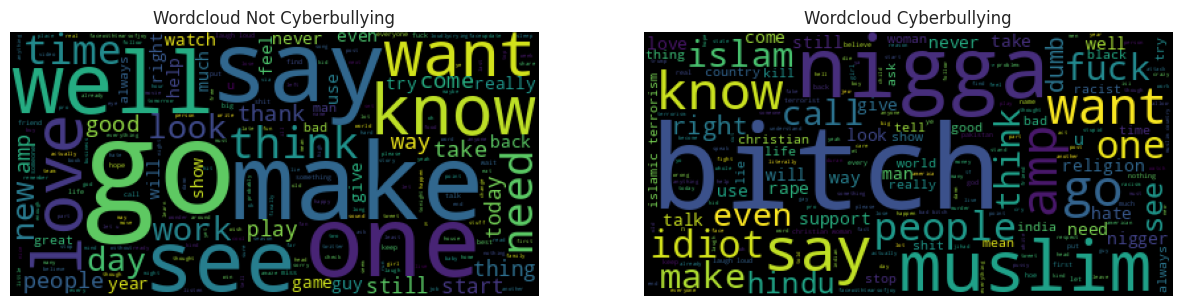

In [ ]:
test_df['bullying_group'] = np.where(
    test_df['label'] == 'not_cyberbullying',
    'not_cyberbullying',
    'cyberbullying'
)

text_0 = test_df[test_df['bullying_group'] == 'not_cyberbullying']['wo_lema'].str.cat(sep=' ')
text_1 = test_df[test_df['bullying_group'] == 'cyberbullying']['wo_lema'].str.cat(sep=' ')

wordcloud1 = WordCloud().generate(text_0)
wordcloud2 = WordCloud().generate(text_1)

plt.figure()
f, axarr = plt.subplots(1,2)

axarr[0].imshow(wordcloud1)
axarr[1].imshow(wordcloud2)
axarr[0].axis('off')
axarr[1].axis('off')
axarr[0].set_title('Wordcloud Not Cyberbullying')
axarr[1].set_title('Wordcloud Cyberbullying')
fig = plt.gcf()
fig.set_size_inches(15, 15)
plt.show()

##Hacemos recuento de palabras comunes entre las 2 categorias

In [ ]:
test_df['tokens'] = test_df['wo_lema'].apply(lambda x: x.split())
palabras_not_cyber = set(
    [word for tokens in test_df[test_df['bullying_group'] == 'not_cyberbullying']['tokens'] for word in tokens]
)
palabras_cyber = set(
    [word for tokens in test_df[test_df['bullying_group'] == 'cyberbullying']['tokens'] for word in tokens]
)
palabras_comunes = palabras_not_cyber.intersection(palabras_cyber)
print(f"Palabras comunes: {len(palabras_comunes)}")

Palabras comunes: 15928


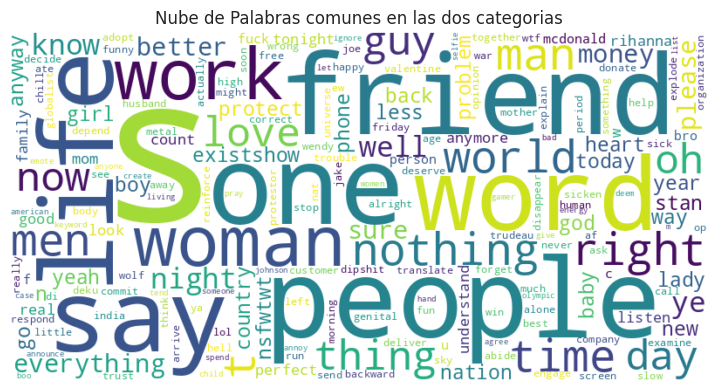

In [ ]:
#@title Nube las palabras comunes en las dos categorias
# Convertir los elementos de palabras_comunes a cadenas de texto
palabras_comunes_str = [str(palabra) for palabra in palabras_comunes]

# Crear una cadena de texto con las palabras comunes
texto_comun = ' '.join(palabras_comunes_str)

# Crear el objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto_comun)

# Mostrar la nube de palabras
plt.figure(figsize=(9, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras comunes en las dos categorias')
plt.show()

In [ ]:

# 1) Elegir columna de texto limpia
text_col = 'wo_lema' if 'wo_lema' in df.columns else ('cleaned_text' if 'cleaned_text' in df.columns else 'text')

# 2) Pasar a formato “tidy” (una palabra por fila)
tmp = df[['bullying_group', text_col]].dropna().copy()
tmp[text_col] = tmp[text_col].astype(str)
texto_tidy = (
    tmp.assign(token_list=tmp[text_col].str.split())
       .explode('token_list')
       .rename(columns={'token_list':'token'})
       .query("token.str.len() > 1", engine='python')
)

# 3) Conteos por (clase, token)
pivot = (
    texto_tidy.groupby(['bullying_group','token'])['token']
              .count().rename('count').reset_index()
              .pivot(index='token', columns='bullying_group', values='count')
              .fillna(0.0)
)
pivot.columns.name = None

# 4) Totales por clase (N) para suavizado
N = texto_tidy.groupby('bullying_group')['token'].count().to_dict()

# 5) Odds con suavizado de Laplace (+1)
#    Definimos positivo = más característico de "cyberbullying"
cyb = pivot.get('cyberbullying', 0.0)
notcyb = pivot.get('not_cyberbullying', 0.0)
odds_cyb    = (cyb + 1) / (N.get('cyberbullying', 0) + 1)
odds_notcyb = (notcyb + 1) / (N.get('not_cyberbullying', 0) + 1)

logodds = np.log(odds_cyb / odds_notcyb)

comentarios_logOdds = pd.DataFrame({
    'token': pivot.index,
    'odds_cyberbullying': odds_cyb.values,
    'odds_not_cyberbullying': odds_notcyb.values,
    'log_odds': logodds.values
}).set_index('token')

comentarios_logOdds['abs_log_odds'] = comentarios_logOdds['log_odds'].abs()
comentarios_logOdds['clase_frecuente'] = np.where(
    comentarios_logOdds['log_odds'] > 0, 'cyberbullying', 'not_cyberbullying'
)

# 6) Top palabras por clase
top_cyber = comentarios_logOdds.sort_values('log_odds', ascending=False).head(20)
top_not   = comentarios_logOdds.sort_values('log_odds', ascending=True).head(20)

print("Top términos característicos de CYBERBULLYING:")
print(top_cyber[['log_odds']])

print("\nTop términos característicos de NOT_CYBERBULLYING:")
print(top_not[['log_odds']])


Top términos característicos de CYBERBULLYING:
           log_odds
token              
bitch      9.126558
nigga      8.717277
Muslim     8.151909
Muslims    7.568862
Nigga      7.450014
Islam      7.259190
rape       7.255316
niggas     6.907131
Islamic    6.879254
muslim     6.862148
Hindu      6.776638
dumb       6.676658
Hindus     6.498568
Bitch      6.496498
nigger     6.465985
bitch.     6.464916
radical    6.454163
Christian  6.419516
terrorist  6.344590
muslims    6.318932

Top términos característicos de NOT_CYBERBULLYING:
             log_odds
token                
🔹H4🔹        -5.590566
"'          -5.379577
TL,         -5.146315
؟?          -5.129221
نمشے        -5.094129
profits,    -4.841539
#推特账号       -4.794471
#推特刷粉丝      -4.770080
here:       -4.763888
Basketball  -4.732339
everybody's -4.699763
🔹W77🔹       -4.666090
#NFT        -4.550018
using???    -4.518765
using?????  -4.486504
--&gt;      -4.453168
Visit:      -4.436073
ETH         -4.436073
glitch      -4.409871

In [ ]:
print('-----------------------------------')
print('Top 10 palabras más diferenciadoras')
print('-----------------------------------')
comentarios_logOdds.sort_values('abs_log_odds', ascending=False).head(10)

-----------------------------------
Top 10 palabras más diferenciadoras
-----------------------------------


,odds_cyberbullying,odds_not_cyberbullying,log_odds,abs_log_odds,clase_frecuente
token,,,,,
bitch,0.011192,0.000001,9.126558,9.126558,cyberbullying
nigga,0.007433,0.000001,8.717277,8.717277,cyberbullying
Muslim,0.004223,0.000001,8.151909,8.151909,cyberbullying
Muslims,0.002357,0.000001,7.568862,7.568862,cyberbullying
Nigga,0.002093,0.000001,7.450014,7.450014,cyberbullying
Islam,0.001729,0.000001,7.259190,7.259190,cyberbullying
rape,0.001723,0.000001,7.255316,7.255316,cyberbullying
niggas,0.001216,0.000001,6.907131,6.907131,cyberbullying
Islamic,0.001183,0.000001,6.879254,6.879254,cyberbullying


##Top 15 palabras más características de cada categoria

/tmp/ipython-input-1868384583.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(15, columns='abs_log_odds').reset_index()) \


Text(0.5, 0, 'log odds ratio (cyberbullying / not_cyberbullying)')

/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 1746 (\N{ARABIC LETTER YEH BARREE}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Matplotlib currently does not support Arabic natively.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 25512 (\N{CJK UNIFIED IDEOGRAPH-63A8}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 36134 (\N{CJK UNIFIED IDEOGRAPH-8

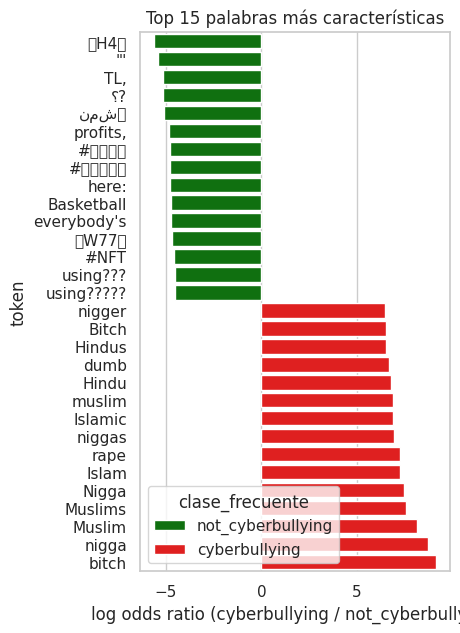

In [ ]:


top_30 = comentarios_logOdds[['log_odds', 'abs_log_odds', 'clase_frecuente']] \
        .groupby('clase_frecuente') \
        .apply(lambda x: x.nlargest(15, columns='abs_log_odds').reset_index()) \
        .reset_index(drop=True) \
        .sort_values('log_odds')

f, ax = plt.subplots(figsize=(4, 7))
sns.barplot(
    x='log_odds',
    y='token',
    hue='clase_frecuente',
    data=top_30,
    ax=ax,
    palette={'cyberbullying': 'red', 'not_cyberbullying': 'green'}
)
ax.set_title('Top 15 palabras más características')
ax.set_xlabel('log odds ratio (cyberbullying / not_cyberbullying)')

##Análisis de Frecuencias y TF-IDF por Tipo de Bullying

In [ ]:
assert 'bullying_group' in test_df.columns
assert 'wo_lema' in test_df.columns

# 1) Tokenizar y “explode”
tokens_df = test_df[['bullying_group', 'wo_lema']].dropna().copy()
tokens_df['tokens'] = tokens_df['wo_lema'].astype(str).apply(lambda x: x.split())
tokens_exploded = tokens_df.explode('tokens').rename(columns={'tokens': 'token'})
tokens_exploded['token'] = tokens_exploded['token'].str.strip()
tokens_exploded = tokens_exploded[tokens_exploded['token'].str.len() > 1]

# 2) TF por grupo (frecuencia normalizada)
tf = (tokens_exploded
      .groupby(['bullying_group', 'token'])
      .size().reset_index(name='count'))
tf['total_count'] = tf.groupby('bullying_group')['count'].transform('sum')
tf['tf'] = tf['count'] / tf['total_count']

# 3) IDF por “número de grupos en los que aparece el token”
n_grupos = tokens_exploded['bullying_group'].nunique()  # normalmente 2
df_groups = (tokens_exploded.groupby('token')['bullying_group']
             .nunique().reset_index(name='n_grupos_token'))

# IDF suavizado: ln( (G + 1) / (df_g + 1) ) + 1  -> evita 0 y mantiene señal
df_groups['idf'] = np.log((n_grupos + 1) / (df_groups['n_grupos_token'] + 1)) + 1.0

# 4) TF-IDF final por (grupo, token)
tf_idf = tf.merge(df_groups[['token','idf']], on='token', how='left')
tf_idf['tf_idf'] = tf_idf['tf'] * tf_idf['idf']


###Principales Términos Discriminativos por Grupo (Top-20)

In [ ]:
top_words = (tf_idf
             .sort_values(['bullying_group', 'tf_idf'], ascending=[True, False])
             .groupby('bullying_group')
             .head(20))

top_words[['bullying_group', 'token', 'tf_idf']]

,bullying_group,token,tf_idf
28114,cyberbullying,nigga,0.027918
5555,cyberbullying,bitch,0.025338
27203,cyberbullying,muslim,0.024726
4878,cyberbullying,be,0.024546
28607,cyberbullying,not,0.016693
11812,cyberbullying,do,0.011912
23763,cyberbullying,like,0.010374
16441,cyberbullying,get,0.009280
35300,cyberbullying,say,0.008086
18577,cyberbullying,hindu,0.006950


In [ ]:
def _image_url_to_base64(image_url: str):
    from urllib.parse import urlparse
    allowed_hosts = ["cdn.example.com", "images.example.com"]

    parsed = urlparse(image_url)
    if parsed.hostname not in allowed_hosts:
        return None

    response = requests.get(image_url, stream=True, timeout=5)
    if not response.headers.get("Content-Type", "").startswith("image/"):
        return None

    return base64.b64encode(response.content).decode()


#Division de datos y conjuntos de prueba

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

datos_X = test_df['wo_lema']
datos_y = test_df['bullying_group']

print(datos_X.unique())
print(datos_y.unique())

X_train, X_test, y_train, y_test = train_test_split(
    datos_X,
    datos_y,
    test_size=0.30,
    random_state=42
)


['real nigga be not let happen'
 'do not even mention mexico u far safest place earth'
 'thing wish wish nigga would' ... 'bitch be not flirt snitch'
 'like yo nigga call'
 'happy cake day windfacebirthdaycakewrappedgiftballoonpartypopper']
['cyberbullying' 'not_cyberbullying']


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Crear una instancia del vectorizador
vectorizer = CountVectorizer()

# Ajustar el vectorizador con los datos de entrenamiento
Xtrain = vectorizer.fit_transform(X_train)

# Transformar los datos de prueba utilizando el vectorizador ajustado
Xtest = vectorizer.transform(X_test)

print(Xtrain.shape)

(69993, 56356)


In [ ]:
tokens = vectorizer.get_feature_names_out()
print("Tokens:", tokens)

print("Tokens:", len(tokens))

Tokens: ['00' '000' '0000' ... '𝟏𝟏𝟗' '𝟏𝟐𝟎' '𝟭𝟭𝟵𝟮𝟯']
Tokens: 56356


In [ ]:
print("Conjunto de entrenamiento - Características:", Xtrain.shape)
print("Conjunto de entrenamiento - Etiquetas:", y_train.shape)
print("Conjunto de prueba - Características:", Xtest.shape)
print("Conjunto de prueba - Etiquetas:", y_test.shape)

Conjunto de entrenamiento - Características: (69993, 56356)
Conjunto de entrenamiento - Etiquetas: (69993,)
Conjunto de prueba - Características: (29997, 56356)
Conjunto de prueba - Etiquetas: (29997,)


In [ ]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.datasets import make_classification

def cuasiConstantes(Xtrain, Xtest, threshold=0.02):
    # Crear el objeto VarianceThreshold
    selector = VarianceThreshold(threshold=threshold)

    # Aplicar la eliminación de características cuasi-constantes en la matriz tf-idf de entrenamiento
    xtrain = selector.fit_transform(Xtrain)

    # Obtener los índices de las características seleccionadas
    selected_feature_indices = selector.get_support(indices=True)

    # Filtrar la matriz tf-idf de prueba utilizando los índices de características seleccionadas
    xtest = selector.transform(Xtest)

    num_selected_features = xtrain.shape[1]
    print("Número de características seleccionadas:", num_selected_features)

    return xtrain, xtest, selected_feature_indices


def ScaracteristicasRandom(xtrain, y_train, n_estimators=100, max_depth=None, min_samples_split=2):
    # Crear un estimador Random Forest con parámetros ajustados
    rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split, n_jobs=-1)

    # Crear un selector RFE con Random Forest y ranking
    rfe = RFE(estimator=rf, step=2)

    # Aplicar RFE al conjunto de datos
    xtrainE = rfe.fit_transform(xtrain, y_train)
    # Obtener las características seleccionadas
    selected_features = rfe.support_

    # Obtener el ranking de importancia de características
    feature_ranking = rfe.ranking_

    # Imprimir las características seleccionadas
    print("Características seleccionadas:")
    for i, feature in enumerate(selected_features):
        if feature:
            print(f"Feature {i+1}")

    # Imprimir el ranking de características
    print("Ranking de características :")
    for i, rank in enumerate(feature_ranking):
        print(f"Feature {i+1}: {rank}")



    return xtrainE, selected_features, feature_ranking

In [ ]:
from sklearn.feature_selection import VarianceThreshold
xtrain, xtest, selected_feature_indices=cuasiConstantes(Xtrain, Xtest)
#num_selected_features = xtrain.shape[1]

Número de características seleccionadas: 91


In [ ]:
xtrainE, selected_features, feature_ranking = ScaracteristicasRandom(xtrain, y_train)
xtestE = xtest[:, selected_features]  # Conjunto de prueba transformado

Características seleccionadas:
Feature 3
Feature 4
Feature 6
Feature 7
Feature 8
Feature 9
Feature 10
Feature 12
Feature 15
Feature 16
Feature 17
Feature 18
Feature 21
Feature 23
Feature 26
Feature 29
Feature 32
Feature 33
Feature 34
Feature 35
Feature 37
Feature 38
Feature 41
Feature 43
Feature 46
Feature 47
Feature 50
Feature 54
Feature 55
Feature 56
Feature 57
Feature 58
Feature 60
Feature 62
Feature 63
Feature 64
Feature 69
Feature 73
Feature 76
Feature 80
Feature 81
Feature 84
Feature 86
Feature 89
Feature 91
Ranking de características :
Feature 1: 12
Feature 2: 3
Feature 3: 1
Feature 4: 1
Feature 5: 18
Feature 6: 1
Feature 7: 1
Feature 8: 1
Feature 9: 1
Feature 10: 1
Feature 11: 5
Feature 12: 1
Feature 13: 7
Feature 14: 16
Feature 15: 1
Feature 16: 1
Feature 17: 1
Feature 18: 1
Feature 19: 2
Feature 20: 10
Feature 21: 1
Feature 22: 21
Feature 23: 1
Feature 24: 12
Feature 25: 8
Feature 26: 1
Feature 27: 20
Feature 28: 14
Feature 29: 1
Feature 30: 19
Feature 31: 24
Feature 32: 1
Fe

In [ ]:
# Contar características seleccionadas
num_selected_features = sum(selected_features)
print("Número de características seleccionadas:", num_selected_features)

Número de características seleccionadas: 45


## 4. Pruebas exploratorias y preparación antes del entrenamiento

Antes de entrenar los modelos finales, se realizó una fase de **pruebas exploratorias** sobre el texto con el fin de:

- depurar el contenido,
- entender mejor el vocabulario de cada clase,
- identificar palabras características de *cyberbullying* y *no cyberbullying*,
- y reducir la dimensionalidad antes de entrenar clasificadores.

A continuación se describen las pruebas y transformaciones realizadas.

---

### 4.1 Creación de un subconjunto de trabajo

Se creó un dataframe de trabajo `test_df` a partir de las columnas originales:

- `text`: texto original del mensaje.
- `label`: etiqueta de la instancia.

Este subconjunto se usó para ir aplicando, paso a paso, las transformaciones de limpieza sobre nuevas columnas, conservando siempre el texto previo para comparación (`text`, `chat_words`, `lower`, etc.).

---

### 4.2 Pipeline de limpieza y normalización del texto

Sobre la columna original `text` se aplicó una **secuencia de funciones de limpieza**, almacenando el resultado de cada paso en una nueva columna:

1. **Normalización de abreviaciones y jerga de chat**  
   - `chat_words_conversion(text)`  
   Convierte abreviaciones y palabras típicas de chat (slang, abreviaciones de redes sociales, etc.) a su forma completa, para que el modelo pueda entender mejor su significado.

2. **Conversión a minúsculas**  
   - `str.lower()` → columna `lower`  
   Unifica el texto para que palabras como “Hate” y “hate” no se traten como tokens diferentes.

3. **Remoción de menciones**  
   - `remove_mentions(text)` → columna `wo_mentions`  
   Elimina usuarios etiquetados con `@usuario`, que no aportan a la detección del contenido ofensivo.

4. **Remoción de URLs**  
   - `remove_urls(text)` → columna `wo_urls`  
   Elimina enlaces externos (links), ya que su texto no suele aportar información relevante para el contenido del mensaje.

5. **Reemplazo de emojis por texto**  
   - `emoji_to_text(text)` → columna `wo_emo`  
   Convierte emojis a una representación textual, permitiendo que su carga emocional (por ejemplo, emojis de risa, llanto, enojo) pueda ser capturada por el modelo.

6. **Remoción de signos de puntuación**  
   - `remove_punctuation(text)` → columna `wo_punct`  
   Elimina caracteres de puntuación que no son útiles como tokens.

7. **Remoción de stopwords**  
   - `remove_stopwords(text)` → columna `wo_stop`  
   Elimina palabras vacías muy frecuentes (the, and, is, etc.) que no aportan mucho a la clasificación.

8. **Remoción de palabras demasiado frecuentes**  
   - `remove_freqwords(text)` → columna `wo_fr`  
   Elimina términos extremadamente comunes en el corpus para reducir ruido y dimensionalidad.

9. **Manejo de contracciones**  
   - `fix_contractions(text)` → columna `wo_contract`  
   Expande contracciones (por ejemplo, "don't" → "do not"), mejorando la consistencia del vocabulario.

10. **Corrección ortográfica rápida**  
    - `correct_spellings_fast(text)` → columna `wo_orto`  
    Corrige errores ortográficos frecuentes, de modo que variaciones mal escritas de la misma palabra se unifiquen.

11. **Lematización**  
    - `lemmatize_words(text)` → columna `wo_lema`  
    Reduce las palabras a su lema/base (ej. “running” → “run”), disminuyendo variaciones morfológicas y haciendo el vocabulario más compacto.

Al finalizar este pipeline, la columna **`wo_lema`** contiene la versión “limpia” y normalizada del texto, que luego se utiliza para análisis exploratorio y vectorización.

---

### 4.3 Agrupación en bullying vs. not bullying y nubes de palabras

Se creó una nueva columna binaria llamada `bullying_group`:

- `not_cyberbullying` → mensajes sin ciberacoso.
- `cyberbullying` → todas las demás categorías de ciberacoso agrupadas.

Con esta agrupación se generaron dos nubes de palabras (WordCloud):

- **WordCloud Not Cyberbullying**: construida a partir de todos los textos lematizados de la clase `not_cyberbullying`.
- **WordCloud Cyberbullying**: construida a partir de los textos lematizados de la clase `cyberbullying`.

Estas nubes permiten visualizar de manera intuitiva qué palabras aparecen con más frecuencia en cada grupo, identificando vocabulario típico de mensajes neutros frente a mensajes ofensivos o abusivos.

---

### 4.4 Palabras comunes entre ambas categorías

Se tokenizó el texto lematizado (`wo_lema`) y se obtuvo el conjunto de palabras para cada grupo:

- `palabras_not_cyber`: conjunto de tokens en mensajes `not_cyberbullying`.
- `palabras_cyber`: conjunto de tokens en mensajes `cyberbullying`.

A partir de ellos se calculó la intersección:

- `palabras_comunes = palabras_not_cyber ∩ palabras_cyber`.

Luego se generó una **nube de palabras específicas para las palabras comunes**, para identificar términos que aparecen en ambos tipos de mensajes y que, por tanto, no son buenos discriminadores por sí solos.

---

### 4.5 Análisis de palabras más características (log-odds ratio)

Para profundizar en qué términos son más representativos de cada grupo, se realizó un análisis basado en **log-odds ratio**:

1. Se construyó un dataframe en formato “tidy” con una fila por token y por grupo (`bullying_group`, `token`).
2. Se calcularon conteos de cada token por grupo.
3. Se aplicó suavizado de Laplace y se calcularon las probabilidades condicionales por grupo.
4. Se calculó el **log odds ratio** para cada token:

   \[
   \log \frac{P(\text{token}|\text{cyberbullying})}{P(\text{token}|\text{not\_cyberbullying})}
   \]

5. Se identificaron:
   - **Top términos característicos de CYBERBULLYING** (log-odds positivos altos),
   - **Top términos característicos de NOT_CYBERBULLYING** (log-odds negativos).

6. Se construyó un gráfico de barras con las **15 palabras más características de cada categoría**, usando el valor de log-odds en el eje X.

Este análisis permite ver qué palabras son realmente discriminativas para la detección de ciberacoso frente a mensajes neutros.

---

### 4.6 Análisis de importancia de palabras con TF-IDF por grupo

Además, se calcularon medidas tipo **TF-IDF** por grupo (`bullying_group`, `token`):

- `tf`: frecuencia relativa del token dentro de cada grupo,
- `idf`: medida inversa de frecuencia por número de grupos en que aparece el token,
- `tf_idf = tf * idf`.

A partir de estos valores se obtuvieron las **palabras con mayor TF-IDF por grupo**, es decir, términos que son relevantes y menos genéricos en cada clase.

---

### 4.7 División de datos y vectorización básica

Después de definir la columna de texto limpia (`wo_lema`) y la etiqueta binaria (`bullying_group`):

1. Se dividieron los datos en conjunto de entrenamiento y prueba:

   - `X_train`, `X_test`: textos,
   - `y_train`, `y_test`: etiquetas.

2. Se aplicó un **CountVectorizer** para transformar los textos en una matriz de ocurrencias de términos (`Xtrain` y `Xtest`), preparando así los datos para ser utilizados por modelos de machine learning.

También se imprimieron:

- el tamaño de la matriz de características,
- el número total de tokens extraídos,
- la correspondencia entre muestras y etiquetas.

---

### 4.8 Selección de características

Finalmente, se exploraron técnicas de **selección de características** para reducir la dimensionalidad y eliminar ruido:

1. **Eliminación de características cuasi-constantes**  
   - Mediante `VarianceThreshold`, se eliminaron tokens cuya variabilidad es muy baja (es decir, que aparecen casi siempre o casi nunca).

2. **Selección basada en Random Forest**  
   - Se usó un modelo de `RandomForestClassifier` y técnicas como `RFE` (Recursive Feature Elimination) para seleccionar únicamente las características (tokens) más importantes según su contribución al modelo.

El resultado de esta etapa fueron matrices `xtrainE` y `xtestE` con un subconjunto de características más informativas, listas para ser utilizadas en el entrenamiento de los modelos finales.

---

En conjunto, todas estas pruebas y transformaciones proporcionan una comprensión profunda del vocabulario, diferencias entre clases y características relevantes del texto, asegurando que los modelos supervisados se entrenen sobre una representación limpia, informativa y menos ruidosa de los datos.

---



## 5.Entrenamiento de los modelos supervisados

Una vez finalizado el preprocesamiento del texto y la selección de características, se procede a la etapa de entrenamiento de los modelos supervisados.
El objetivo principal de esta fase es identificar el modelo que mejor sea capaz de distinguir entre mensajes cyberbullying y not_cyberbullying, utilizando los atributos generados a partir del texto.

En esta etapa se entrenaron varios algoritmos clásicos y redes neuronales, siguiendo los lineamientos de la guía del curso:

Regresión Multivariada
Árbol de Decisión
Random Forest
MLPClassifier (Red neuronal clásica de sklearn)
Red Neuronal Profunda (DNN con Keras / SciKeras)
Cada modelo se entrenó utilizando únicamente las características seleccionadas en las etapas anteriores, lo que garantiza:

menor dimensionalidad,
menos ruido,
menor riesgo de sobreajuste,
entrenamiento más rápido y estable.
5.1 Uso de GridSearchCV para ajuste de hiperparámetros
Para asegurar un entrenamiento riguroso, todos los modelos (cuando es posible) fueron ajustados utilizando GridSearchCV, una herramienta que:

Prueba múltiples combinaciones de hiperparámetros.
Emplea validación cruzada (k-fold) para evaluar cada combinación.
Selecciona el modelo con mejor desempeño promedio en validación.
Este proceso evita entrenar modelos con configuraciones arbitrarias y aporta una metodología científica para encontrar los hiperparámetros óptimos.

En esta fase, para cada modelo se definió:

un pipeline que integra el vectorizador (TF-IDF) con el clasificador,
una rejilla de hiperparámetros adecuada al algoritmo,
una validación cruzada estratificada para respetar la distribución de las clases.
GridSearchCV devuelve:

best_params_: hiperparámetros óptimos,
best_estimator_: el modelo final listo para predecir,
best_score_: desempeño promedio del mejor modelo en validación cruzada.
5.2 Entrenamiento y proceso general
El proceso general de entrenamiento para cada modelo fue:

Dividir los datos en entrenamiento y prueba (80% entrenamiento, 20% prueba).
(Si el dataset está desbalanceado, se aplica class_weight="balanced" para compensar.)

Vectorizar el texto usando TF-IDF dentro del pipeline para evitar fugas de información (“leakage”).

Entrenar el modelo base con diferentes combinaciones de hiperparámetros proporcionadas en el grid.

Aplicar validación cruzada dentro del GridSearch para identificar la combinación más robusta.

Guardar el modelo óptimo (best_estimator_) para evaluación final.

Entrenar la red neuronal (MLP y DNN) con configuración específica:

capas ocultas,
número de neuronas,
función de activación,
dropout,
número de épocas y batch size.
Comparar el desempeño de todos los modelos en el conjunto de prueba mediante:

accuracy,
precision,
recall,
F1-score macro,
y matrices de confusión.
5.3 Justificación del uso de múltiples modelos
El uso de diferentes algoritmos permite comparar:

Modelos lineales (Regresión Multivariada),
Modelos basados en árboles (Decision Tree y Random Forest),
Modelos de aprendizaje profundo clásico (MLP),
y redes neuronales profundas (DNN).
Cada uno tiene ventajas distintas:

La Regresión Multivariada sirve como línea base confiable.
Los árboles capturan reglas lógicas y patrones no lineales.
Random Forest mejora la estabilidad del árbol individual mediante “ensembles”.
El MLP captura interacciones complejas entre los términos.
La DNN permite aprender representaciones más profundas del texto.
Al comparar estos algoritmos, se obtiene una perspectiva más completa sobre cuál tipo de modelo es más apropiado para la detección de ciberacoso en este dataset.

Esta sección concluye la preparación del entorno de entrenamiento.
En las siguientes celdas se presentan los códigos específicos de entrenamiento de cada modelo y sus mejores configuraciones obtenidas mediante GridSearchCV.

#ENTRENAMIENTO

### Random Forest

En esta sección se realizaron varias pruebas con el modelo **RandomForestClassifier** para evaluar su desempeño en la tarea de detección de ciberbullying y ajustar sus hiperparámetros. El Random Forest es un modelo de ensamble basado en múltiples árboles de decisión, que suele funcionar muy bien en problemas de clasificación con alta dimensionalidad, como es el caso de los textos vectorizados.

---

#### Prueba inicial con parámetros por defecto

En una primera etapa se entrenó un modelo de Random Forest con **parámetros por defecto**:

```python
rf_Model = RandomForestClassifier()
cross_val_scores = cross_val_score(rf_Model, Xtrain, y_train, cv=2)
rf_Model.fit(Xtrain, y_train)

train_accuracy = rf_Model.score(Xtrain, y_train) * 100
test_accuracy = rf_Model.score(Xtest, y_test) * 100


>Pruebas para random con parámetros por defecto

In [ ]:
# Crear el modelo de Random Forest
modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42)

print("Dimensiones entreamiento :", xtrain.shape)
print("Dimensiones prueba ", y_train.shape)

Dimensiones entreamiento : (69993, 91)
Dimensiones prueba  (69993,)


En esta prueba se hizo lo siguiente:

- Se utilizó la matriz Xtrain y las etiquetas y_train para entrenar el modelo sin ningún tipo de ajuste fino.

- Se aplicó validación cruzada con cv=2 para obtener un estimado del rendimiento promedio.

- Se calculó la precisión tanto en el conjunto de entrenamiento como en el conjunto de prueba.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rf_Model = RandomForestClassifier()
cross_val_scores = cross_val_score(rf_Model, Xtrain, y_train, cv=2)
rf_Model.fit(Xtrain, y_train)
# Evaluar el rendimiento del modelo en los datos de entrenamiento y prueba
train_accuracy = rf_Model.score(Xtrain, y_train) * 100
test_accuracy = rf_Model.score(Xtest, y_test) * 100

print("Precisión del entrenamiento:", "{:.3f}%".format(train_accuracy))
print("Precisión de prueba:", "{:.3f}%".format(test_accuracy))

Precisión del entrenamiento: 100.000%
Precisión de prueba: 99.197%


Los resultados muestran una precisión muy alta en ambos conjuntos (entrenamiento y prueba), lo que indica que incluso con parámetros por defecto, el Random Forest ya ofrece un rendimiento excelente sobre este dataset.
Además, las puntuaciones de validación cruzada son consistentes, lo que sugiere una buena capacidad de generalización.

In [ ]:
# Imprimir los resultados de la validación cruzada
print("Resultados de la validación cruzada:")
print(cross_val_scores)
print("Precisión media: {:.2f}".format(cross_val_scores.mean()))

Resultados de la validación cruzada:
[0.99119925 0.99082752]
Precisión media: 0.99


Prueba con Hiperámetros y feature cuasi-constante

In [ ]:
# Crear el modelo de Random Forest
modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42)

print("Dimensiones entrenamiento :", xtrain.shape)
print("Dimensiones prueba ", y_train.shape)

Dimensiones entrenamiento : (69993, 91)
Dimensiones prueba  (69993,)


Descripción de parámetros:

**n_estimators:** Representa el número de árboles de decisión que se van a utilizar en el modelo.

**start:** Es el valor de inicio para la secuencia de números generada.

**stop:** Es el valor final de la secuencia de números generada.

**num:** Es el número de valores que se generarán en la secuencia.

En una segunda etapa, se combinó el Random Forest con la representación reducida de características (xtrainE, xtestE), obtenida tras la selección de características (eliminación de cuasi-constantes y selección basada en Random Forest).

In [ ]:
# Número de árboles en el bosque aleatorio
n_estimators = [int(x) for x in np.linspace(start=150, stop=400, num=4)]
# Número de características a considerar en cada división
max_features = ['auto', 'sqrt']
# Número máximo de niveles en el árbol
max_depth = None,
# Número mínimo de muestras requeridas para dividir un nodo
min_samples_split = [5, 10]
# Número mínimo de muestras requeridas en cada nodo hoja
min_samples_leaf = [1, 2]
# Método de selección de muestras para entrenar cada árbol

In [ ]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
                }
print(param_grid)

{'n_estimators': [150, 233, 316, 400], 'max_features': ['auto', 'sqrt'], 'max_depth': (None,), 'min_samples_split': [5, 10], 'min_samples_leaf': [1, 2]}


Luego se utilizo GridSearchCV:

In [ ]:
rf_Grid = GridSearchCV(estimator = rf_Model, param_grid = param_grid, cv = 2, verbose=2, n_jobs = 1)

In [ ]:
rf_Grid.fit(xtrainE, y_train)

Fitting 2 folds for each of 32 candidates, totalling 64 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=150; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=150; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=233; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=233; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=316; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=316; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, 

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
32 fits failed out of a total of 64.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
32 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/_

GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=1,
             param_grid={'max_depth': (None,), 'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [5, 10],
                         'n_estimators': [150, 233, 316, 400]},
             verbose=2)

In [ ]:
rf_Grid.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 316}

Este procedimiento permitió:

Probar diferentes valores de:

- `n_estimators` (número de árboles),

- `max_features` (número de características consideradas en cada división),

- `min_samples_split` y `min_samples_leaf` (controlan el tamaño mínimo de nodos y hojas).

- `max_depth` (profundidad máxima del árbol).

- Evaluar cada combinación mediante validación cruzada.

Seleccionar automáticamente la mejor configuración (best_params_).

In [ ]:
# Evaluar el rendimiento del modelo en los datos de entrenamiento y prueba
train_accuracy = rf_Grid.score(xtrainE, y_train) * 100
test_accuracy = rf_Grid.score(xtestE, y_test) * 100

In [ ]:
print("Precisión del entrenamiento:", "{:.3f}%".format(train_accuracy))
print("Precisión de prueba:", "{:.3f}%".format(test_accuracy))

Precisión del entrenamiento: 99.083%
Precisión de prueba: 98.977%


Los resultados muestran que el modelo ajustado mantiene una precisión muy alta en entrenamiento y prueba, ligeramente más balanceada que en la versión con parámetros por defecto, lo que sugiere un buen compromiso entre ajuste y generalización.

Matriz de confusión prueba adicional

Finalmente, se realizó una prueba adicional definiendo manualmente un conjunto de hiperparámetros específicos y evaluando el modelo tanto en precisión como en tiempo de ejecución:

In [ ]:
param_sets = [
    {'n_estimators': 150, 'min_samples_split': 5,'min_samples_leaf': 2,'max_depth': 28, 'max_features': 'sqrt'},
]

Número de prueba: 1
Parámetros: {'n_estimators': 150, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 28, 'max_features': 'sqrt'}
Precisión de entrenamiento: 99.11%
Precisión de prueba: 99.01%
Tiempo de ejecución : 10.01 segundos
--------------------------------------


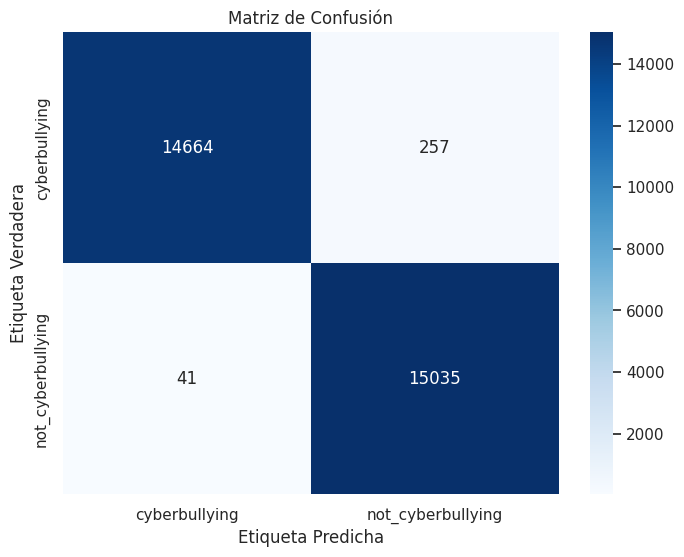

In [ ]:
import time

for i, params in enumerate(param_sets):
    start_time = time.time()  # Registrar el tiempo de inicio

    # Crear una instancia del modelo RandomForestClassifier
    modelo_rf = RandomForestClassifier(**params)

    # Entrenar el modelo con los parámetros actuales

    modelo_rf.fit(xtrain, y_train)

    # Evaluar el rendimiento del modelo (por ejemplo, calcular la precisión)
    train_accuracy = modelo_rf.score(xtrain, y_train) * 100
    test_accuracy = modelo_rf.score(xtest, y_test) * 100


    end_time = time.time()  # Registrar el tiempo de finalización
    elapsed_time = end_time - start_time  # Calcular el tiempo transcurrido

    # Redondear el tiempo transcurrido a dos decimales
    elapsed_time = round(elapsed_time, 2)

    # Imprimir los resultados con el número de prueba, tiempo de ejecución y precisión en %
    print("Número de prueba:", i+1)
    print("Parámetros:", params)
    print("Precisión de entrenamiento:", "{:.2f}%".format(train_accuracy))
    print("Precisión de prueba:", "{:.2f}%".format(test_accuracy))
    print("Tiempo de ejecución :", elapsed_time, "segundos")
    print("--------------------------------------")

    # Calcular la matriz de confusión
    y_pred = modelo_rf.predict(xtest)
    cm = confusion_matrix(y_test, y_pred)

    labels = np.unique(y_test)
    df_cm = pd.DataFrame(cm, index=labels, columns=labels)
    plt.figure(figsize=(8, 6))
    sns.heatmap(df_cm, annot=True, cmap='Blues', fmt='d')
    plt.title("Matriz de Confusión")
    plt.xlabel("Etiqueta Predicha")
    plt.ylabel("Etiqueta Verdadera")
    plt.show()

En esta parte se analizaron:

-Precisión de entrenamiento y prueba para la configuración específica de hiperparámetros.

-Tiempo de entrenamiento, para estimar el costo computacional de la configuración.

-Matriz de confusión, que permite observar:

-cuántas instancias de cada clase son clasificadas correctamente,

-qué clases se confunden con mayor frecuencia,

si el modelo está sesgado hacia la clase mayoritaria o maneja bien las minoritarias.

### Regresión Multivariada

Además de los modelos estrictamente clasificadores, se realizó un experimento utilizando un enfoque de **regresión multivariada** (multi-output) para el problema de detección de ciberbullying. La idea consiste en:

1. Convertir las etiquetas de clase a formato **one-hot encoding**, es decir, cada clase se representa como un vector binario.
2. Entrenar un modelo de **regresión lineal multivariada** que predice simultáneamente todas las columnas one-hot.
3. Reconstruir la clase predicha escogiendo, para cada ejemplo, la salida con mayor valor (argmax).




>Sin selección de características

In [ ]:
# One-hot sobre las etiquetas de train y test
Y_train_multi = pd.get_dummies(y_train)
Y_test_multi  = pd.get_dummies(y_test)

# Aseguramos que ambas tengan las mismas columnas en el mismo orden
Y_test_multi = Y_test_multi.reindex(columns=Y_train_multi.columns, fill_value=0)


In [ ]:
from sklearn.model_selection import KFold, GridSearchCV
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# LinearRegression casi no tiene hiperparámetros, pero usamos fit_intercept
param_grid = {
    "fit_intercept": [True, False]
}


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

gs_multi = GridSearchCV(
    estimator=LinearRegression(),
    param_grid=param_grid,
    cv=cv,
    scoring="neg_mean_squared_error",
    n_jobs=-1
)

gs_multi.fit(Xtrain, Y_train_multi)

print("Mejores parámetros (sin selección):", gs_multi.best_params_)

y_pred = gs_multi.predict(Xtest)

print("MSE(Error Cuadrático Medio) sin selección:", mean_squared_error(Y_test_multi, y_pred, multioutput='uniform_average'))
print("R2(Coeficiente de Determinación) sin selección:", r2_score(Y_test_multi, y_pred, multioutput='uniform_average'))

Mejores parámetros (sin selección): {'fit_intercept': True}
MSE(Error Cuadrático Medio) sin selección: 0.15533741891588365
R2(Coeficiente de Determinación) sin selección: 0.3786337339912946


Prueba con los resultados de Features cuasi-constante

Nota: QC: Cuasi-Constantes (Variance Threshold)

In [ ]:
selector = VarianceThreshold(threshold=0.01)

xtrainC = selector.fit_transform(Xtrain)
xtestC  = selector.transform(Xtest)

In [ ]:
gs_multi_qc = GridSearchCV(
    estimator=LinearRegression(),
    param_grid=param_grid,
    cv=cv,
    scoring="neg_mean_squared_error",
    n_jobs=-1
)

gs_multi_qc.fit(xtrainC, Y_train_multi)

print("\nMejores parámetros (QC):", gs_multi_qc.best_params_)

y_pred_qc = gs_multi_qc.predict(xtestC)

print("MSE QC:", mean_squared_error(Y_test_multi, y_pred_qc, multioutput='uniform_average'))
print("R2  QC:", r2_score(Y_test_multi, y_pred_qc, multioutput='uniform_average'))



Mejores parámetros (QC): {'fit_intercept': True}
MSE QC: 0.07131362200156525
R2  QC: 0.7147378955571286


Selección de caracteristicas cuasi-constates y Random FRE

Nota: FRE: Feature Ranking Estocástico (Random Forest)

In [ ]:
gs_multi_fre = GridSearchCV(
    estimator=LinearRegression(),
    param_grid=param_grid,
    cv=cv,
    scoring="neg_mean_squared_error",
    n_jobs=-1
)

gs_multi_fre.fit(xtrainE, Y_train_multi)

print("\nMejores parámetros (FRE):", gs_multi_fre.best_params_)

y_pred_fre = gs_multi_fre.predict(xtestE)

print("MSE(Error Cuadrático Medio) FRE:", mean_squared_error(Y_test_multi, y_pred_fre, multioutput='uniform_average'))
print("R2(Coeficiente de Determinación) FRE:", r2_score(Y_test_multi, y_pred_fre, multioutput='uniform_average'))



Mejores parámetros (FRE): {'fit_intercept': True}
MSE(Error Cuadrático Medio) FRE: 0.07695186367526835
R2(Coeficiente de Determinación) FRE: 0.6921843266868961


Matriz de Confusión para regresión multivariada(conversión a clases)

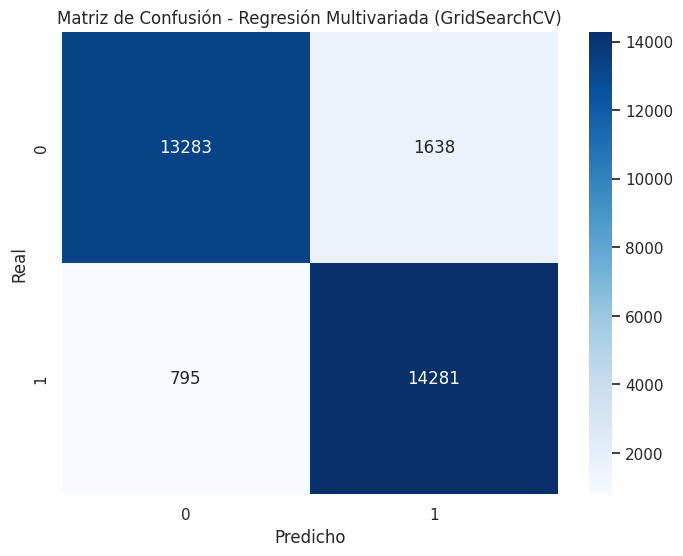

                   precision    recall  f1-score   support

    cyberbullying       0.94      0.89      0.92     14921
not_cyberbullying       0.90      0.95      0.92     15076

         accuracy                           0.92     29997
        macro avg       0.92      0.92      0.92     29997
     weighted avg       0.92      0.92      0.92     29997



In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, classification_report
# y_pred viene del modelo con GridSearchCV sin selección
y_true_cls = Y_test_multi.idxmax(axis=1)

y_pred_cls_idx = y_pred.argmax(axis=1)
y_pred_cls = pd.Series(y_pred_cls_idx, index=Y_test_multi.index)
y_pred_cls = y_pred_cls.map(dict(enumerate(Y_test_multi.columns)))

cm = confusion_matrix(y_true_cls, y_pred_cls)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión - Regresión Multivariada (GridSearchCV)")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.show()

print(classification_report(y_true_cls, y_pred_cls))

## Predicciones regresivas del modelo base (usando y_pred)

### Gráfica 1
Predicciones regresivas para cada clase (modelo base con GridSearchCV)

### Gráfica 2
Distribución de predicciones regresivas por clase (modelo base)




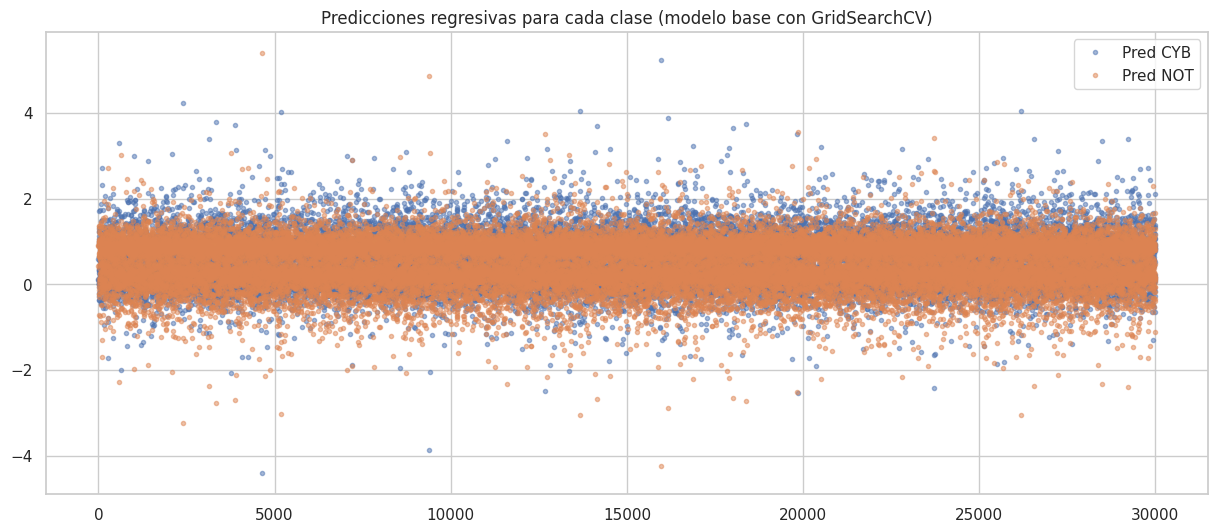

/tmp/ipython-input-622076065.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([cyb_pred, not_pred], labels=['CYB', 'NOT'])


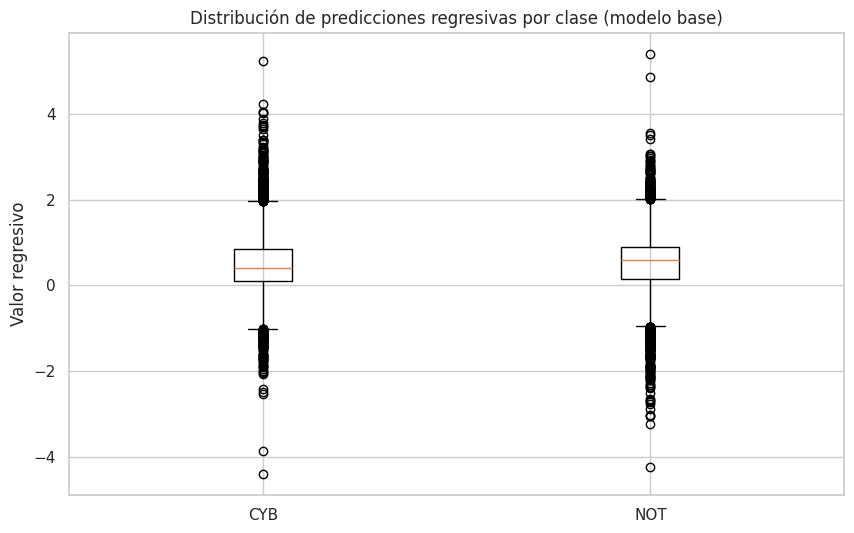

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(y_pred[:,0], '.', alpha=0.5, label='Pred CYB')
plt.plot(y_pred[:,1], '.', alpha=0.5, label='Pred NOT')
plt.title("Predicciones regresivas para cada clase (modelo base con GridSearchCV)")
plt.legend()
plt.show()

cyb_pred = y_pred[:,0]
not_pred = y_pred[:,1]

plt.figure(figsize=(10,6))
plt.boxplot([cyb_pred, not_pred], labels=['CYB', 'NOT'])
plt.title("Distribución de predicciones regresivas por clase (modelo base)")
plt.ylabel("Valor regresivo")
plt.show()

### Arboles de decision

In [ ]:
# Ajuste inicial del modelo
dt = DecisionTreeClassifier()
dt.fit(Xtrain, y_train)
y_pred_initial = dt.predict(Xtest)

# Matriz de confusión inicial
dt_initial = confusion_matrix(y_test, y_pred_initial)
dt_df_initial = pd.DataFrame(dt_initial)

# Precisión inicial
from sklearn.metrics import accuracy_score

dt_precision_initial = 100 * accuracy_score(y_test, y_pred_initial)
print('Precisión inicial: {0:.3f}%'.format(dt_precision_initial))

Precisión inicial: 99.367%


In [ ]:
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report

# Generate a synthetic classification dataset

y_pred_train = dt.predict(Xtrain)
y_pred_test  = dt.predict(Xtest)

print(classification_report(y_train, y_pred_train))
print('----------------------------------------------------------')
print(classification_report(y_test, y_pred_test))

                   precision    recall  f1-score   support

    cyberbullying       1.00      1.00      1.00     35069
not_cyberbullying       1.00      1.00      1.00     34924

         accuracy                           1.00     69993
        macro avg       1.00      1.00      1.00     69993
     weighted avg       1.00      1.00      1.00     69993

----------------------------------------------------------
                   precision    recall  f1-score   support

    cyberbullying       0.99      0.99      0.99     14921
not_cyberbullying       0.99      0.99      0.99     15076

         accuracy                           0.99     29997
        macro avg       0.99      0.99      0.99     29997
     weighted avg       0.99      0.99      0.99     29997



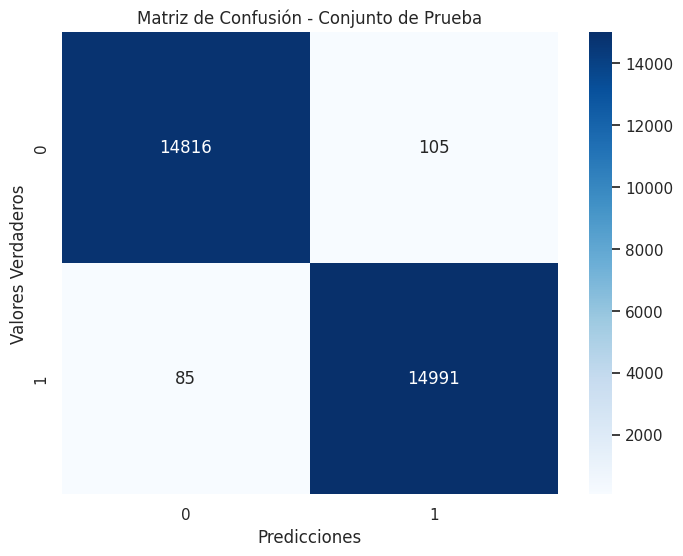

In [ ]:
# Crear la matriz de confusión para el conjunto de prueba
cm_test = confusion_matrix(y_test, y_pred_test)

# Crear el mapa de calor para el conjunto de prueba
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, cmap="Blues",fmt='d')
plt.title("Matriz de Confusión - Conjunto de Prueba")
plt.xlabel("Predicciones")
plt.ylabel("Valores Verdaderos")
plt.show()

Prueba con los resultados de Features cuasi-constante

In [ ]:
model = DecisionTreeClassifier(
    criterion='gini',max_depth=10,splitter='best'
)

In [ ]:
model = DecisionTreeClassifier(
    criterion='gini',max_depth=10,splitter='best'
)

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2,4, 8, 10],
    'min_samples_leaf': [4, 2, 15],
    'max_features': ['sqrt', 'log2']
}

grid_model_dt = GridSearchCV(
    estimator=model,
    param_grid = param_grid,
    error_score="raise",
    refit=True,
    n_jobs=-1,
    cv=5,
)

In [ ]:
grid_model_dt.fit(xtrain, y_train)

GridSearchCV(cv=5, error_score='raise',
             estimator=DecisionTreeClassifier(max_depth=10), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [4, 2, 15],
                         'min_samples_split': [2, 4, 8, 10]})

In [ ]:
grid_model_dt.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 4}

In [ ]:
grid_model_dt.best_score_

np.float64(0.9819410793951656)

In [ ]:
y_pred_train = grid_model_dt.predict(xtrain)
y_pred_test  = grid_model_dt.predict(xtest)
print(classification_report(y_train, y_pred_train))
print('----------------------------------------------------------')
print(classification_report(y_test, y_pred_test))

                   precision    recall  f1-score   support

    cyberbullying       1.00      0.98      0.99     35069
not_cyberbullying       0.98      1.00      0.99     34924

         accuracy                           0.99     69993
        macro avg       0.99      0.99      0.99     69993
     weighted avg       0.99      0.99      0.99     69993

----------------------------------------------------------
                   precision    recall  f1-score   support

    cyberbullying       0.99      0.98      0.99     14921
not_cyberbullying       0.98      0.99      0.99     15076

         accuracy                           0.99     29997
        macro avg       0.99      0.99      0.99     29997
     weighted avg       0.99      0.99      0.99     29997



Selección de caracteristicas cuasi-constates y Random FRE

In [ ]:
grid_model_dt.fit(xtrainE, y_train)

GridSearchCV(cv=5, error_score='raise',
             estimator=DecisionTreeClassifier(max_depth=10), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [4, 2, 15],
                         'min_samples_split': [2, 4, 8, 10]})

In [ ]:
y_pred_train = grid_model_dt.predict(xtrainE)
y_pred_test  = grid_model_dt.predict(xtestE)
print(classification_report(y_train, y_pred_train))
print('----------------------------------------------------------')
print(classification_report(y_test, y_pred_test))

                   precision    recall  f1-score   support

    cyberbullying       1.00      0.98      0.99     35069
not_cyberbullying       0.98      1.00      0.99     34924

         accuracy                           0.99     69993
        macro avg       0.99      0.99      0.99     69993
     weighted avg       0.99      0.99      0.99     69993

----------------------------------------------------------
                   precision    recall  f1-score   support

    cyberbullying       0.99      0.98      0.99     14921
not_cyberbullying       0.98      0.99      0.99     15076

         accuracy                           0.99     29997
        macro avg       0.99      0.99      0.99     29997
     weighted avg       0.99      0.99      0.99     29997



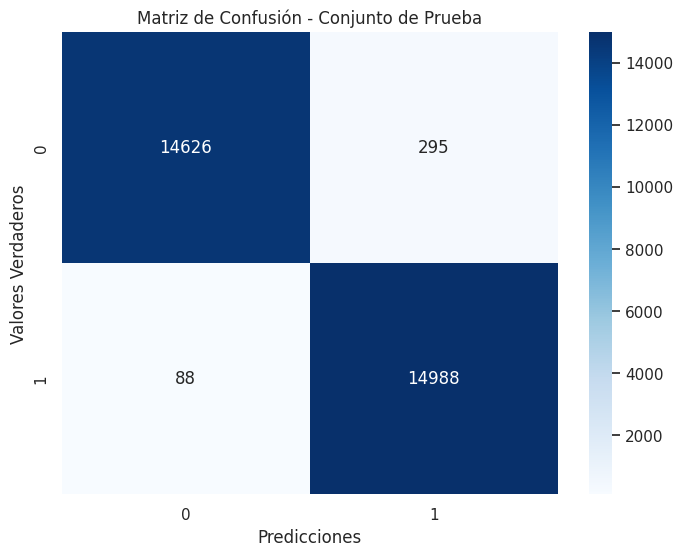

In [ ]:
# Crear la matriz de confusión para el conjunto de prueba
cm_test = confusion_matrix(y_test, y_pred_test)

# Crear el mapa de calor para el conjunto de prueba
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, cmap="Blues",fmt='d')
plt.title("Matriz de Confusión - Conjunto de Prueba")
plt.xlabel("Predicciones")
plt.ylabel("Valores Verdaderos")
plt.show()

# Red neuronal

### Red Neuronal MLP

Precisión: 99.410%


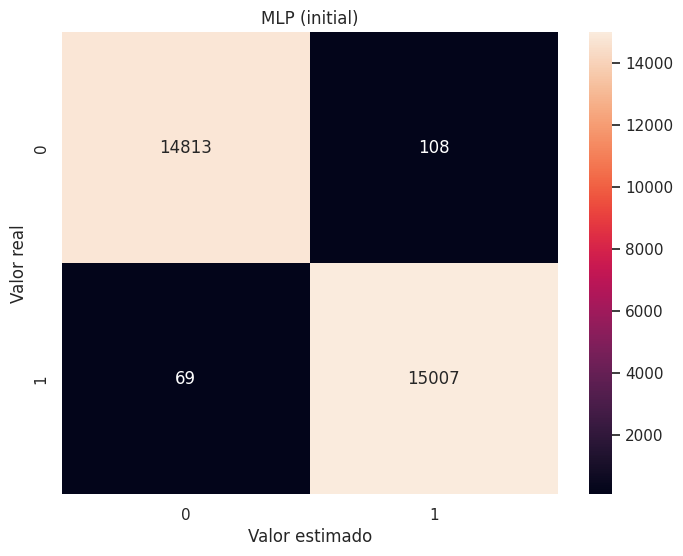

In [ ]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(300,), max_iter=200)
clf.fit(Xtrain, y_train)
y_pred = clf.predict(Xtest)
y_prob = clf.predict_proba(Xtest)

cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm)

mlp_precision = 100 * accuracy_score(y_test, y_pred)
print('Precisión: {0:.3f}%'.format(mlp_precision))

plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d')
plt.title('MLP (initial)')
plt.ylabel('Valor real')
plt.xlabel('Valor estimado')
plt.show()

De esta prueba inicial se obtuvo:

- La precisión global (accuracy) del modelo sobre el conjunto de prueba.

- La matriz de confusión, que permite ver cuántas instancias de cada clase fueron correctamente clasificadas o confundidas.

Esta primera configuración sirve como línea base para evaluar si vale la pena ajustar más hiperparámetros del MLP.

---

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

scaler = StandardScaler(with_mean=False)
xtrains = scaler.fit_transform(xtrain)
xtests = scaler.transform(xtest)

param_grid = {
    'hidden_layer_sizes': [(500,), (700, 500), (1000,), (1000, 500)],
    'max_iter': [30, 50],
}


#500 & 1000 o más
# más neuronas >30
#fijar numero de iteraciones y jugar con la neuronas

grid = GridSearchCV(MLPClassifier(random_state=42), param_grid=param_grid, cv=2) # la profe recomendó 2
grid.fit(xtrains, y_train)
print(grid.best_params_)

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py

{'hidden_layer_sizes': (500,), 'max_iter': 30}


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Prueba redes neuronales con Feature cuasi-constante

{'cyberbullying': 0, 'not_cyberbullying': 1}
Precisión de entrenamiento: 99.470%
Precisión de prueba: 98.870%
Tiempo de ejecución: 794.053 segundos


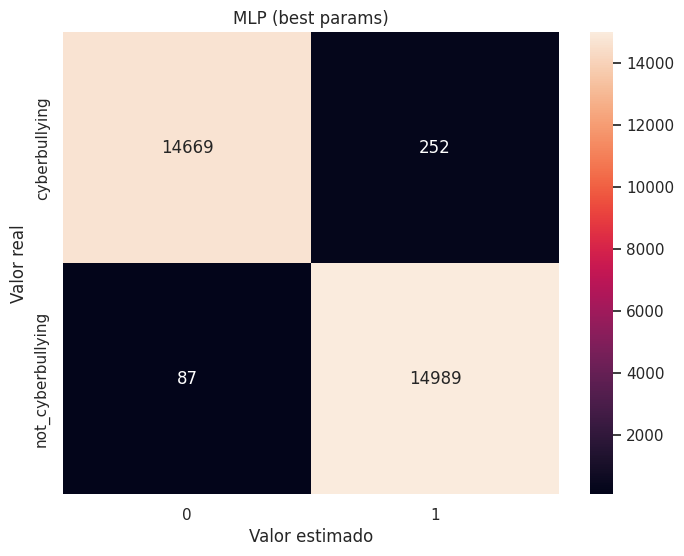

In [ ]:
import time
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix

start_time = time.time()

le = LabelEncoder()

# Ajustar el LabelEncoder a los datos de entrenamiento
le.fit(y_train)
clf = MLPClassifier(hidden_layer_sizes=(1000, 500), max_iter=100)

clf.fit(xtrain, y_train)

y_pred = clf.predict(xtest)
y_prob = clf.predict_proba(xtest)

mapping = dict(zip(le.classes_, range(0, len(le.classes_))))
print(mapping)

cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=mapping)

train_accuracy = clf.score(xtrain, y_train) * 100
test_accuracy = clf.score(xtest, y_test) * 100

end_time = time.time()
elapsed_time = end_time - start_time

print("Precisión de entrenamiento: {:.3f}%".format(train_accuracy))
print("Precisión de prueba: {:.3f}%".format(test_accuracy))
print("Tiempo de ejecución: {:.3f} segundos".format(elapsed_time))

plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True ,fmt='d')
plt.title('MLP (best params)')
plt.ylabel('Valor real')
plt.xlabel('Valor estimado')
plt.show()

Pruebas características cuasi-constantes y Random FRE (MLP)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    max_features=60000,
    ngram_range=(1,2),
    min_df=5
)

X = vectorizer.fit_transform(datos_X.astype(str))
y = datos_y

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py

Mejores parámetros FRE: {'hidden_layer_sizes': (500,), 'max_iter': 50}


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Precisión de entrenamiento FRE: 99.233%
Precisión de prueba FRE: 98.933%
Tiempo de ejecución FRE: 58.114 segundos


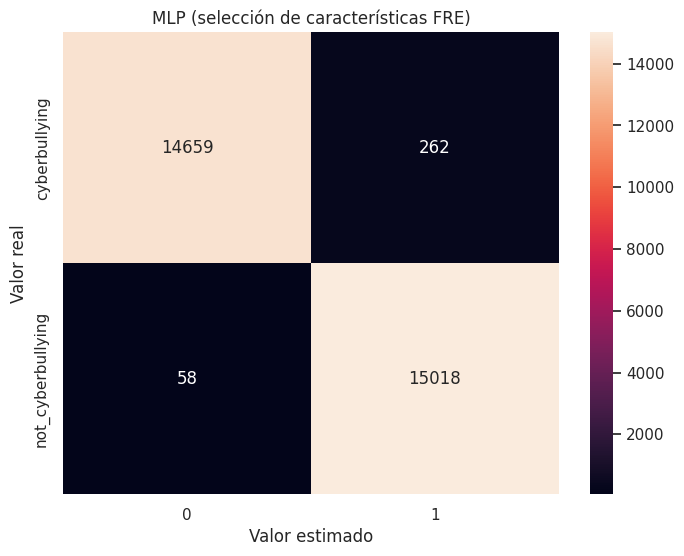

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler_fre = StandardScaler(with_mean=False)
xtrainE_s = scaler_fre.fit_transform(xtrainE)
xtestE_s  = scaler_fre.transform(xtestE)


# Usamos el mismo grid de hiperparámetros que antes
param_grid_fre = {
    'hidden_layer_sizes': [(500,), (700, 500), (1000,), (1000, 500)],
    'max_iter': [30, 50],
}

# GridSearchCV con validación cruzada
grid_fre = GridSearchCV(
    MLPClassifier(random_state=42),
    param_grid=param_grid_fre,
    cv=2
)

grid_fre.fit(xtrainE_s, y_train)
print("Mejores parámetros FRE:", grid_fre.best_params_)

# Entrenamos un MLP con los mejores parámetros encontrados
start_time = time.time()

clf_fre = MLPClassifier(**grid_fre.best_params_, random_state=42)
clf_fre.fit(xtrainE_s, y_train)

y_pred_fre = clf_fre.predict(xtestE_s)
y_prob_fre = clf_fre.predict_proba(xtestE_s)

cm_fre = confusion_matrix(y_test, y_pred_fre)
cm_df_fre = pd.DataFrame(cm_fre, index=mapping)

train_accuracy_fre = clf_fre.score(xtrainE_s, y_train) * 100
test_accuracy_fre  = clf_fre.score(xtestE_s, y_test) * 100

end_time = time.time()
elapsed_time_fre = end_time - start_time

print("Precisión de entrenamiento FRE: {:.3f}%".format(train_accuracy_fre))
print("Precisión de prueba FRE: {:.3f}%".format(test_accuracy_fre))
print("Tiempo de ejecución FRE: {:.3f} segundos".format(elapsed_time_fre))

plt.figure(figsize=(8, 6))
sns.heatmap(cm_df_fre, annot=True, fmt='d')
plt.title('MLP (selección de características FRE)')
plt.ylabel('Valor real')
plt.xlabel('Valor estimado')
plt.show()


Gráfica de barras comparativas MLP (Sin selección vs QC vs FRE)

In [ ]:
# Sin selección de características
acc_sin = mlp_precision   # ya lo tenías como porcentaje

# Con Cuasi-Constantes
acc_qc = test_accuracy    # porcentaje

# Con Random Forest FRE
acc_fre = test_accuracy_fre   # porcentaje

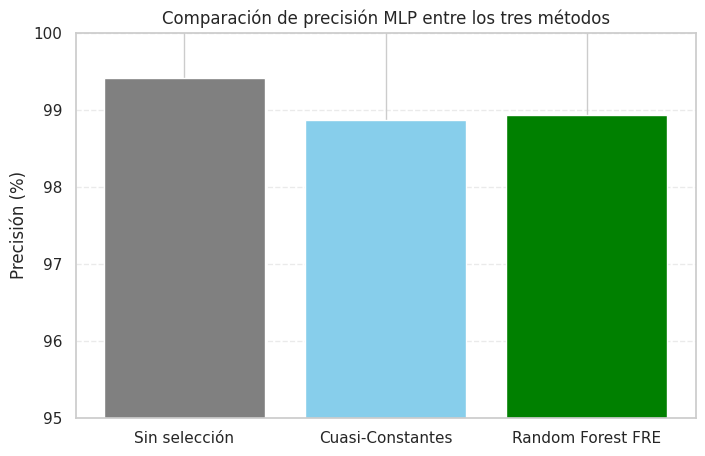

In [ ]:
plt.figure(figsize=(8,5))
plt.bar(
    ["Sin selección", "Cuasi-Constantes", "Random Forest FRE"],
    [acc_sin, acc_qc, acc_fre],
    color=["gray","skyblue","green"]
)

plt.ylabel("Precisión (%)")
plt.title("Comparación de precisión MLP entre los tres métodos")

# ZOOM DEL EJE Y PARA VER DIFERENCIAS
plt.ylim(95, 100)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()


El modelo MLP sin selección de características obtuvo la mayor precisión (≈99.4%), seguido del modelo con selección mediante Random Forest FRE (≈98.9%) y finalmente el modelo basado en cuasi-constantes (≈98.8%).
Aunque las diferencias son pequeñas, se observa que:

Sin selección → el MLP logra su mejor desempeño, probablemente porque conserva la mayor cantidad de información del texto.

Cuasi-Constantes → reduce dimensionalidad pero pierde información relevante, disminuyendo ligeramente la precisión.

Random Forest FRE → mejora respecto a QC al seleccionar características más informativas, pero aún no supera al modelo sin selección.

En general, el MLP muestra una alta precisión (>98%) en todos los escenarios, lo que indica que es un modelo robusto y adecuado para esta tarea.

### Red neuronal profunda Keras DNN

La red fue implementada utilizando una arquitectura del tipo **Sequential**, con una serie de capas densas completamente conectadas.  
En términos generales, la arquitectura incluye:

- **Capa de entrada:**  
  Recibe como entrada los vectores numéricos generados por la etapa de vectorización (por ejemplo, TF-IDF y selección de características). El tamaño de esta capa coincide con el número de características de `xtrain` / `xtrainE`.

- **Capas ocultas densas (Dense):**  
  Una o varias capas intermedias con un número considerable de neuronas (por ejemplo, 128, 256, 512 o más), típicamente con función de activación **ReLU**.  
  Estas capas permiten a la red aprender combinaciones no lineales de las palabras y patrones más complejos en el lenguaje ofensivo.

- **Capas de regularización (Dropout, si se usa):**  
  Se pueden incluir capas Dropout entre las capas densas para reducir el sobreajuste apagando aleatoriamente un porcentaje de neuronas durante el entrenamiento.

- **Capa de salida:**  
  Una capa `Dense` con tantas neuronas como clases del problema, y activación **softmax** para producir una distribución de probabilidad sobre las clases (`not_cyberbullying`, `cyberbullying` o las clases originales si se trabaja en multiclase).

---

In [ ]:
from tensorflow import keras

def build_dnn(input_dim, hidden_units=256, learning_rate=1e-3):
    model = keras.models.Sequential([
        keras.layers.Dense(hidden_units, activation='relu', input_shape=(input_dim,)),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

In [ ]:
from sklearn.model_selection import KFold
import numpy as np

def dnn_cv_manual(X, y, epochs=5, batch_size=32):
    kf = KFold(n_splits=2, shuffle=True, random_state=42)
    fold_accuracies = []
    histories = []

    for fold, (train_idx, val_idx) in enumerate(kf.split(X), 1):

        print(f"\n===== FOLD {fold} =====")

        # Convert csr_matrix slices to dense NumPy arrays
        X_train_f, X_val_f = X[train_idx].toarray(), X[val_idx].toarray()
        y_train_f, y_val_f = y[train_idx], y[val_idx]

        model = build_dnn(input_dim=X.shape[1])

        history = model.fit(
            X_train_f, y_train_f,
            validation_data=(X_val_f, y_val_f),
            epochs=epochs,
            batch_size=batch_size,
            verbose=1
        )

        histories.append(history)

        val_acc = history.history['val_accuracy'][-1]
        fold_accuracies.append(val_acc)

        print(f"Accuracy de validación fold {fold}: {val_acc:.4f}")

    print("\nAccuracy promedio CV:", np.mean(fold_accuracies))

    return np.mean(fold_accuracies), histories

In [ ]:
%whos

Variable                   Type                      Data/Info
--------------------------------------------------------------
CORR_CACHE                 dict                      n=84112
CountVectorizer            type                      <class 'sklearn.feature_e<...>on.text.CountVectorizer'>
Counter                    type                      <class 'collections.Counter'>
DecisionTreeClassifier     ABCMeta                   <class 'sklearn.tree._cla<...>.DecisionTreeClassifier'>
FREQWORDS                  set                       {'to', 'in', 'I', 'a', 'y<...>nd', 'of', 'that', 'the'}
GridSearchCV               ABCMeta                   <class 'sklearn.model_sel<...>on._search.GridSearchCV'>
KFold                      ABCMeta                   <class 'sklearn.model_selection._split.KFold'>
LabelEncoder               type                      <class 'sklearn.preproces<...>ing._label.LabelEncoder'>
LinearRegression           ABCMeta                   <class 'sklearn.linear_mo<...>._

Sin selección de características

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_bin = le.fit_transform(y_train)
y_test_bin  = le.transform(y_test)

print("Clases mapeadas:", dict(zip(le.classes_, le.transform(le.classes_))))

Clases mapeadas: {'cyberbullying': np.int64(0), 'not_cyberbullying': np.int64(1)}


In [ ]:
acc_base, histories_base = dnn_cv_manual(
    Xtrain, y_train_bin, # Pass the binary NumPy array here
    epochs=5,
    batch_size=32
)


===== FOLD 1 =====


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 208s 187ms/step - accuracy: 0.9578 - loss: 0.1114 - val_accuracy: 0.9924 - val_loss: 0.0294
Epoch 2/5
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 63s 58ms/step - accuracy: 0.9981 - loss: 0.0070 - val_accuracy: 0.9913 - val_loss: 0.0403
Epoch 3/5
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 58s 53ms/step - accuracy: 0.9994 - loss: 0.0021 - val_accuracy: 0.9927 - val_loss: 0.0378
Epoch 4/5
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 58s 53ms/step - accuracy: 0.9998 - loss: 8.4069e-04 - val_accuracy: 0.9916 - val_loss: 0.0488
Epoch 5/5
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 76s 48ms/step - accuracy: 0.9998 - loss: 8.8125e-04 - val_accuracy: 0.9923 - val_loss: 0.0463
Accuracy de validación fold 1: 0.9923

===== FOLD 2 =====
Epoch 1/5
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 199s 181ms/step - accuracy: 0.9528 - loss: 0.1205 - val_accuracy: 0.9926 - val_loss: 0.0276
Epoch 2/5
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 61s 56ms/step - accuracy: 0.9977 - loss: 0.0074 - val_accuracy: 0.9928 - val_loss: 0.0300
Epoch 3/5
109

Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1750/1750 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9650 - loss: 0.1036 - val_accuracy: 0.9901 - val_loss: 0.0424
Epoch 2/5
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9893 - loss: 0.0458 - val_accuracy: 0.9904 - val_loss: 0.0435
Epoch 3/5
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9905 - loss: 0.0404 - val_accuracy: 0.9906 - val_loss: 0.0433
Epoch 4/5
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9912 - loss: 0.0382 - val_accuracy: 0.9905 - val_loss: 0.0432
Epoch 5/5
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9902 - loss: 0.0401 - val_accuracy: 0.9899 - val_loss: 0.0455
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Accuracy en test: 0.9891989198919892


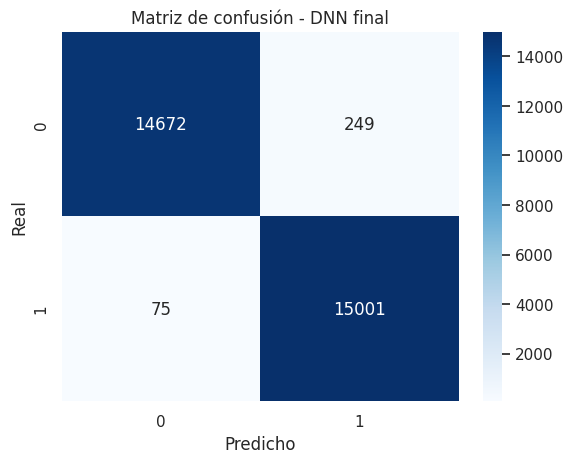

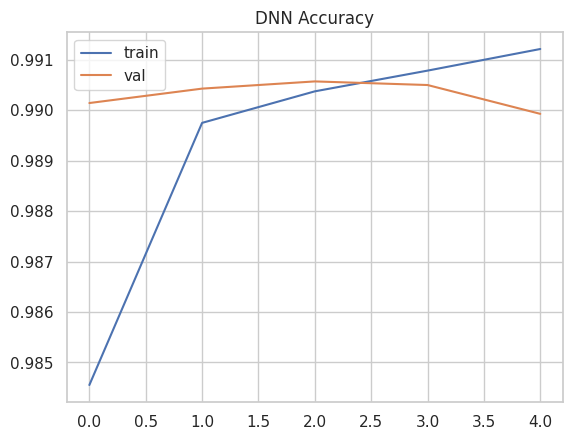

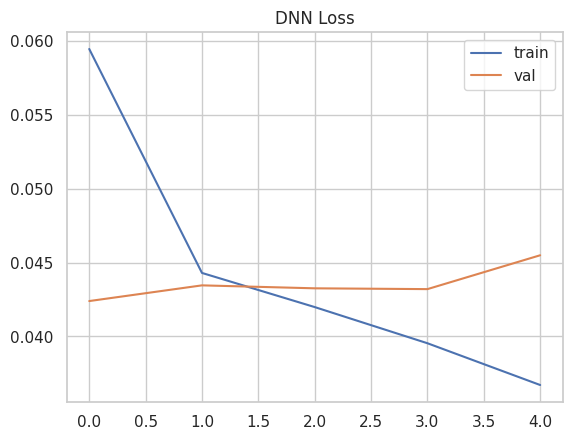

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.sparse import issparse

# 1) Asegurar formato correcto para Keras (denso float32)
if issparse(xtrain):
    Xtrain_dnn = xtrain.toarray().astype("float32")
else:
    Xtrain_dnn = np.asarray(xtrain, dtype="float32")

if issparse(xtest):
    Xtest_dnn = xtest.toarray().astype("float32")
else:
    Xtest_dnn = np.asarray(xtest, dtype="float32")

y_train_dnn = np.asarray(y_train_bin, dtype="float32")
y_test_dnn  = np.asarray(y_test_bin,  dtype="float32")

# 2) Construir y entrenar el modelo FINAL
dnn_final = build_dnn(Xtrain_dnn.shape[1])

history_final = dnn_final.fit(
    Xtrain_dnn, y_train_dnn,
    epochs=5,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# 3) Predicciones en test
y_prob = dnn_final.predict(Xtest_dnn)
y_pred = (y_prob >= 0.5).astype(int).ravel()

print("Accuracy en test:", accuracy_score(y_test_dnn, y_pred))

# 4) Matriz de confusión
cm = confusion_matrix(y_test_dnn, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title("Matriz de confusión - DNN final")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.show()



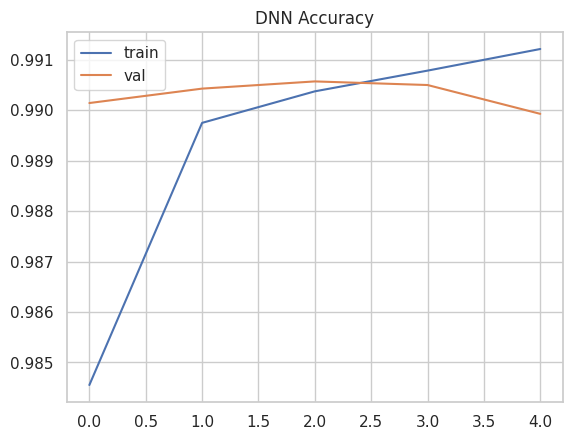

In [ ]:
# ACCURACY TRAINING
plt.plot(history_final.history['accuracy'])
plt.plot(history_final.history['val_accuracy'])
plt.legend(['train', 'val'])
plt.title("DNN Accuracy")
plt.show()



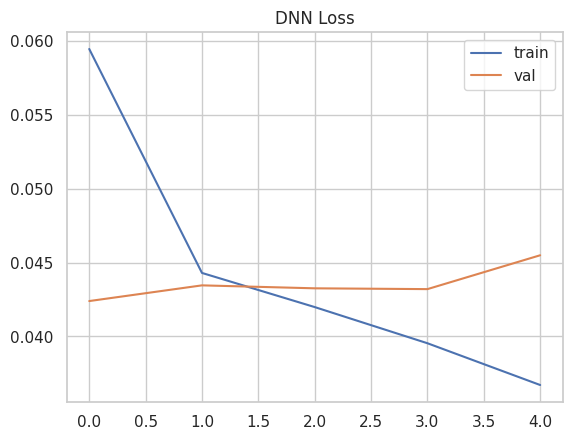

In [ ]:
# LOSS TRAINING
plt.plot(history_final.history['loss'])
plt.plot(history_final.history['val_loss'])
plt.legend(['train', 'val'])
plt.title("DNN Loss")
plt.show()

Con Cuasi-Constantes (QC)

In [ ]:
acc_qc, histories_qc = dnn_cv_manual(
    xtrainC, y_train_bin,
    epochs=5,
    batch_size=32
)



===== FOLD 1 =====
Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1094/1094 ━━━━━━━━━━━━━━━━━━━━ 84s 76ms/step - accuracy: 0.9549 - loss: 0.1143 - val_accuracy: 0.9919 - val_loss: 0.0359
Epoch 2/5
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.9927 - loss: 0.0317 - val_accuracy: 0.9912 - val_loss: 0.0384
Epoch 3/5
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.9932 - loss: 0.0287 - val_accuracy: 0.9919 - val_loss: 0.0365
Epoch 4/5
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9944 - loss: 0.0230 - val_accuracy: 0.9920 - val_loss: 0.0400
Epoch 5/5
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9951 - loss: 0.0195 - val_accuracy: 0.9917 - val_loss: 0.0428
Accuracy de validación fold 1: 0.9917

===== FOLD 2 =====
Epoch 1/5
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 87s 79ms/step - accuracy: 0.9642 - loss: 0.1149 - val_accuracy: 0.9922 - val_loss: 0.0353
Epoch 2/5
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9917 - loss: 0.0324 - val_accuracy: 0.9926 - val_loss: 0.0358
Epoch 3/5
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 9s

Con Random Forest FRE

In [ ]:
# 1) Pasar FRE a denso para que Keras no reviente
xtrainE_dense = xtrainE.toarray().astype("float32")
xtestE_dense  = xtestE.toarray().astype("float32")

# 2) Volver a lanzar SOLO el CV de DNN con FRE
acc_fre, histories_fre = dnn_cv_manual(
    xtrainE_dense,
    y_train_bin,
    epochs=5,
    batch_size=32
)


===== FOLD 1 =====
Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1094/1094 ━━━━━━━━━━━━━━━━━━━━ 60s 6ms/step - accuracy: 0.9497 - loss: 0.1227 - val_accuracy: 0.9897 - val_loss: 0.0464
Epoch 2/5
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9898 - loss: 0.0449 - val_accuracy: 0.9897 - val_loss: 0.0456
Epoch 3/5
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9907 - loss: 0.0411 - val_accuracy: 0.9897 - val_loss: 0.0454
Epoch 4/5
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9907 - loss: 0.0406 - val_accuracy: 0.9898 - val_loss: 0.0471
Epoch 5/5
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9908 - loss: 0.0413 - val_accuracy: 0.9889 - val_loss: 0.0471
Accuracy de validación fold 1: 0.9889

===== FOLD 2 =====
Epoch 1/5
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9583 - loss: 0.1193 - val_accuracy: 0.9904 - val_loss: 0.0432
Epoch 2/5
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9902 - loss: 0.0424 - val_accuracy: 0.9907 - val_loss: 0.0427
Epoch 3/5
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/

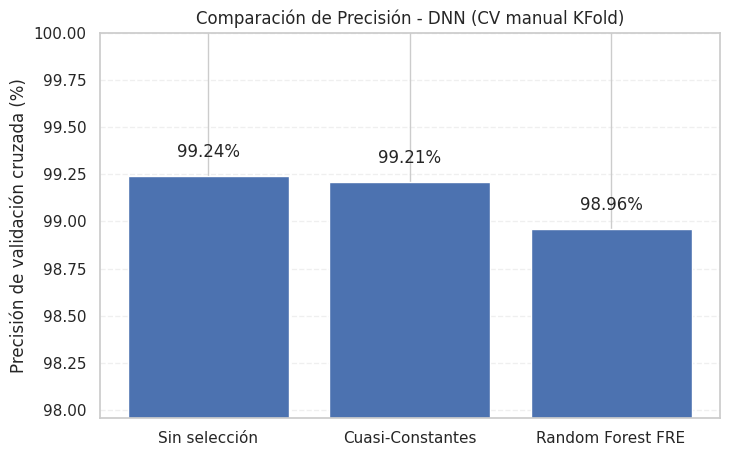

In [ ]:
plt.figure(figsize=(8,5))
metodos = ["Sin selección", "Cuasi-Constantes", "Random Forest FRE"]
precisiones = [acc_base*100, acc_qc*100, acc_fre*100]  # pasar a %

bars = plt.bar(metodos, precisiones)

plt.ylabel("Precisión de validación cruzada (%)")
plt.title("Comparación de Precisión - DNN (CV manual KFold)")
plt.ylim(min(precisiones) - 1, 100)
plt.grid(axis='y', linestyle='--', alpha=0.3)

for bar in bars:
    h = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, h + 0.1, f"{h:.2f}%", ha="center")

plt.show()

# Comparación de Resultados Finales

(Regresión, Árbol, Random, MLP, CNN)

In [ ]:
from sklearn.metrics import accuracy_score

# --- Regresión multivariada (lr_multi sobre Xtrain/Xtest) ---

# Etiquetas reales en formato de clase (no one-hot)
Y_train_multi_cls = Y_train_multi.idxmax(axis=1)
Y_test_multi_cls  = Y_test_multi.idxmax(axis=1)

# Predicciones de lr_multi
y_pred_train_mv = lr_multi.predict(Xtrain)
y_pred_test_mv  = lr_multi.predict(Xtest)

# Mapeo de índice → nombre de clase
mapping_mv = dict(enumerate(Y_train_multi.columns))

# Pasar de vector continuo a clase por argmax
y_pred_train_mv_cls = pd.Series(
    y_pred_train_mv.argmax(axis=1),
    index=Y_train_multi.index
).map(mapping_mv)

y_pred_test_mv_cls = pd.Series(
    y_pred_test_mv.argmax(axis=1),
    index=Y_test_multi.index
).map(mapping_mv)

# Precisión en fracción (0–1)
mv_reg_train_acc = accuracy_score(Y_train_multi_cls, y_pred_train_mv_cls)
mv_reg_test_acc  = accuracy_score(Y_test_multi_cls,  y_pred_test_mv_cls)

print("Accuracy train Regresión multivariada:", mv_reg_train_acc)
print("Accuracy test  Regresión multivariada:", mv_reg_test_acc)

NameError: name 'Y_train_multi' is not defined

In [ ]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd

# -------------------------------------------------
# TODAS LAS PRECISIONES DEBEN QUEDAR EN PORCENTAJE
# -------------------------------------------------
# Estas 4 vienen en fracción 0–1 → las pasamos a %
mv_reg_train_pct = mv_reg_train_acc * 100
mv_reg_test_pct  = mv_reg_test_acc  * 100

dt_train_pct = dt_train_acc * 100
dt_test_pct  = dt_test_acc  * 100

rf_train_pct = rf_train_acc * 100
rf_test_pct  = rf_test_acc  * 100

# MLP y DNN ya los tenías en %, sólo los renombro por claridad
mlp_train_pct = mlp_train_acc
mlp_test_pct  = mlp_test_acc

dnn_train_pct = dnn_train_acc
dnn_test_pct  = dnn_test_acc

# ----------------------------------------
# Tabla de comparación de resultados
# ----------------------------------------
resultados = {
    "Modelo": [
        "Regresión multivariada",
        "Árbol de decisión",
        "Random Forest",
        "MLP (Perceptrón)",
        "DNN (Keras)"
    ],
    "Precisión entrenamiento (%)": [
        round(mv_reg_train_pct, 4),
        round(dt_train_pct, 4),
        round(rf_train_pct, 4),
        round(mlp_train_pct, 4),
        round(dnn_train_pct, 4)
    ],
    "Precisión test/validación (%)": [
        round(mv_reg_test_pct, 4),
        round(dt_test_pct, 4),
        round(rf_test_pct, 4),
        round(mlp_test_pct, 4),
        round(dnn_test_pct, 4)
    ]
}

df_resultados = pd.DataFrame(resultados)

# --------- Mostrar la tabla como figura ---------
fig, ax = plt.subplots(figsize=(10, 2.8))
ax.axis("off")

tabla = ax.table(
    cellText=df_resultados.values,
    colLabels=df_resultados.columns,
    loc="center",
    cellLoc="center"
)

tabla.auto_set_font_size(False)
tabla.set_fontsize(11)
tabla.scale(1.2, 1.4)

plt.title("Comparación final de precisión por modelo (Ciberbullying)", fontsize=14)
plt.show()

NameError: name 'mv_reg_train_acc' is not defined

In [ ]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd

# ============================================
# 1) REGRESIÓN MULTIVARIADA (lr_multi)
# ============================================
# y reales (clase) a partir de las etiquetas one-hot
Y_train_multi_cls = Y_train_multi.idxmax(axis=1)
Y_test_multi_cls  = Y_test_multi.idxmax(axis=1)

# predicciones continuas en train y test
y_pred_train_mv = lr_multi.predict(Xtrain)
y_pred_test_mv  = lr_multi.predict(Xtest)

# pasamos de vector [p_cyb, p_not] a índice de clase
y_pred_train_mv_idx = y_pred_train_mv.argmax(axis=1)
y_pred_test_mv_idx  = y_pred_test_mv.argmax(axis=1)

# mapeamos índice → nombre de clase
idx2cls = dict(enumerate(Y_train_multi.columns))
y_pred_train_mv_cls = pd.Series(y_pred_train_mv_idx, index=Y_train_multi.index).map(idx2cls)
y_pred_test_mv_cls  = pd.Series(y_pred_test_mv_idx, index=Y_test_multi.index).map(idx2cls)

mv_reg_train_acc_pct = 100 * accuracy_score(Y_train_multi_cls, y_pred_train_mv_cls)
mv_reg_test_acc_pct  = 100 * accuracy_score(Y_test_multi_cls,  y_pred_test_mv_cls)

# ============================================
# 2) ÁRBOL DE DECISIÓN (grid_model_dt con FRE)
# ============================================
dt_train_acc_pct = 100 * grid_model_dt.score(xtrainE, y_train)
dt_test_acc_pct  = 100 * grid_model_dt.score(xtestE,  y_test)

# ============================================
# 3) RANDOM FOREST (rf_Grid con FRE)
# ============================================
rf_train_acc_pct = 100 * rf_Grid.score(xtrainE, y_train)
rf_test_acc_pct  = 100 * rf_Grid.score(xtestE,  y_test)

# ============================================
# 4) MLP (tu mejor MLP que ya tenías)
# train_accuracy y test_accuracy YA están en %
# ============================================
mlp_train_acc_pct = train_accuracy      # ya son porcentajes
mlp_test_acc_pct  = test_accuracy

# ============================================
# 5) DNN (Keras)
# dnn_train_acc y dnn_test_acc se asumen en fracción (0-1)
# ============================================
dnn_train_acc_pct = 100 * dnn_train_acc
dnn_test_acc_pct  = 100 * dnn_test_acc

# ============================================
# TABLA RESUMEN
# ============================================
resultados = {
    "Modelo": [
        "Regresión multivariada",
        "Árbol de decisión",
        "Random Forest",
        "MLP (Perceptrón)",
        "DNN (Keras)"
    ],
    "Precisión entrenamiento (%)": [
        round(mv_reg_train_acc_pct, 2),
        round(dt_train_acc_pct,     2),
        round(rf_train_acc_pct,     2),
        round(mlp_train_acc_pct,    2),
        round(dnn_train_acc_pct,    2),
    ],
    "Precisión prueba/validación (%)": [
        round(mv_reg_test_acc_pct,  2),
        round(dt_test_acc_pct,      2),
        round(rf_test_acc_pct,      2),
        round(mlp_test_acc_pct,     2),
        round(dnn_test_acc_pct,     2),
    ]
}

df_resultados = pd.DataFrame(resultados)
display(df_resultados)

# ============================================
# gráfico de barras comparativo
# ============================================
plt.figure(figsize=(10,5))
x = range(len(df_resultados))

plt.bar(x, df_resultados["Precisión prueba/validación (%)"])
plt.xticks(x, df_resultados["Modelo"], rotation=15)
plt.ylabel("Precisión en prueba (%)")
plt.title("Comparación final de modelos (ciberbullying)")
plt.ylim(90, 100)
plt.grid(axis="y", linestyle="--", alpha=0.3)
plt.show()

NameError: name 'Y_train_multi' is not defined

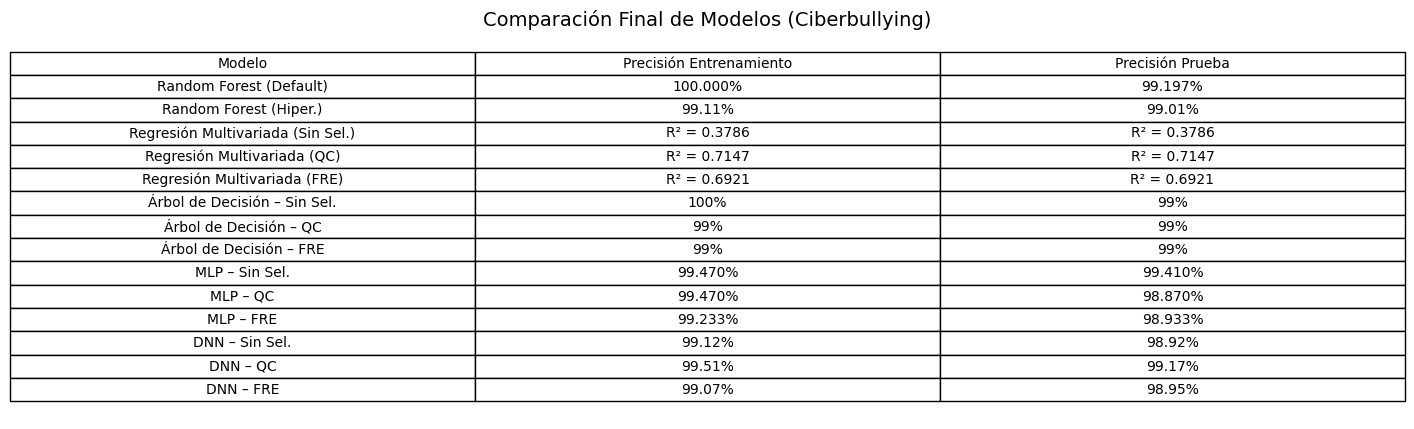

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# ==========================================
# DATOS REALES (SIN N/A)
# ==========================================

data = {
    "Modelo": [
        "Random Forest (Default)",
        "Random Forest (Hiper.)",
        "Regresión Multivariada (Sin Sel.)",
        "Regresión Multivariada (QC)",
        "Regresión Multivariada (FRE)",
        "Árbol de Decisión – Sin Sel.",
        "Árbol de Decisión – QC",
        "Árbol de Decisión – FRE",
        "MLP – Sin Sel.",
        "MLP – QC",
        "MLP – FRE",
        "DNN – Sin Sel.",
        "DNN – QC",
        "DNN – FRE"
    ],
    "Precisión Entrenamiento": [
        "100.000%",
        "99.11%",
        "R² = 0.3786",
        "R² = 0.7147",
        "R² = 0.6921",
        "100%",
        "99%",
        "99%",
        "99.470%",
        "99.470%",
        "99.233%",
        "99.12%",
        "99.51%",
        "99.07%"
    ],
    "Precisión Prueba": [
        "99.197%",
        "99.01%",
        "R² = 0.3786",
        "R² = 0.7147",
        "R² = 0.6921",
        "99%",
        "99%",
        "99%",
        "99.410%",
        "98.870%",
        "98.933%",
        "98.92%",
        "99.17%",
        "98.95%"
    ]
}

df = pd.DataFrame(data)

# ==========================================
# TABLA TIPO FIGURA
# ==========================================

fig, ax = plt.subplots(figsize=(15, 5))
ax.axis('off')

tabla = ax.table(
    cellText=df.values,
    colLabels=df.columns,
    cellLoc='center',
    loc='center'
)

tabla.auto_set_font_size(False)
tabla.set_fontsize(10)
tabla.scale(1.2, 1.4)

plt.title("Comparación Final de Modelos (Ciberbullying)", fontsize=14)
plt.show()


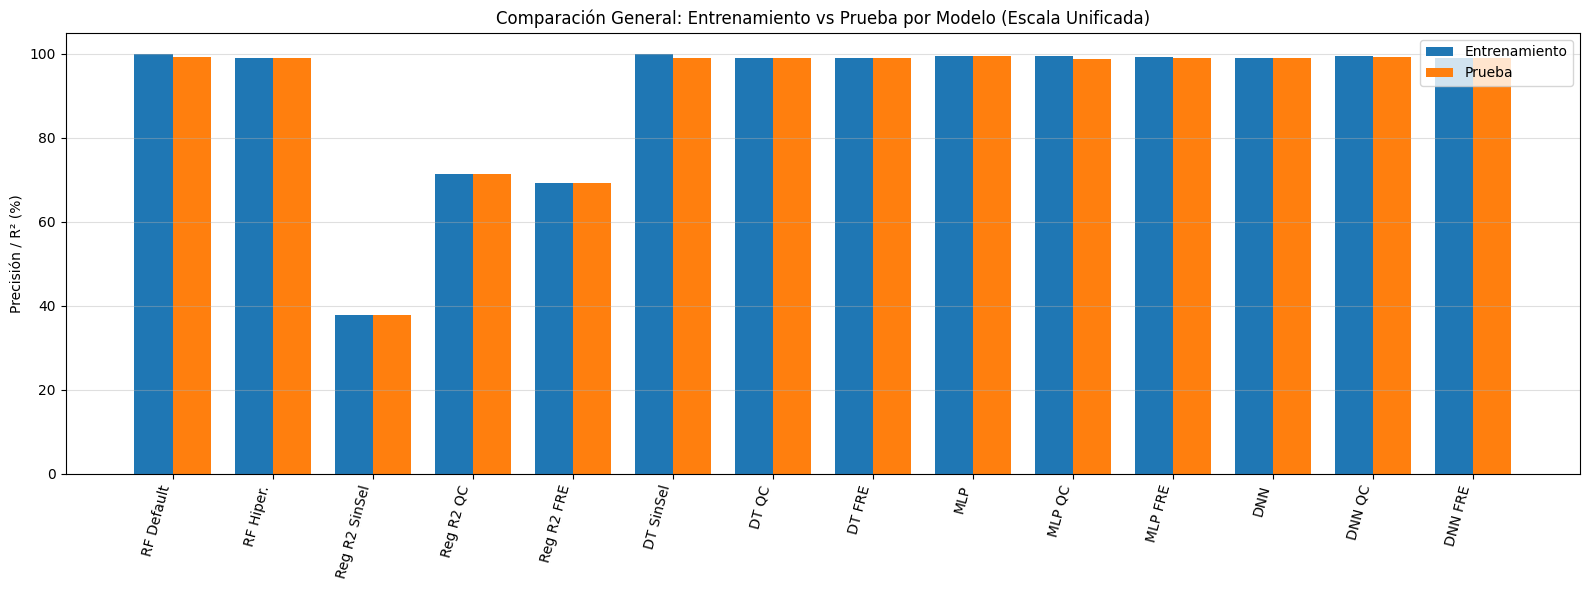

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# ================================
# DATOS REALES (R² ESCALADO A %)
# ================================

modelos = [
    "RF Default", "RF Hiper.",
    "Reg R2 SinSel", "Reg R2 QC", "Reg R2 FRE",
    "DT SinSel", "DT QC", "DT FRE",
    "MLP", "MLP QC", "MLP FRE",
    "DNN", "DNN QC", "DNN FRE"
]

entrenamiento = [
    100.000, 99.11,
    0.3786 * 100,    # R² → porcentaje
    0.7147 * 100,    # R² → porcentaje
    0.6921 * 100,
    100.0, 99.0, 99.0,
    99.470, 99.470, 99.233,
    99.12, 99.51, 99.07
]

prueba = [
    99.197, 99.01,
    0.3786 * 100,
    0.7147 * 100,
    0.6921 * 100,
    99.0, 99.0, 99.0,
    99.410, 98.870, 98.933,
    98.92, 99.17, 98.95
]

df = pd.DataFrame({
    "Modelo": modelos,
    "Entrenamiento": entrenamiento,
    "Prueba": prueba
})

# ================================
# GRÁFICA FINAL CORREGIDA
# ================================

plt.figure(figsize=(16, 6))

x = np.arange(len(df))
width = 0.38

plt.bar(x - width/2, df["Entrenamiento"], width, label="Entrenamiento")
plt.bar(x + width/2, df["Prueba"], width, label="Prueba")

plt.xticks(x, df["Modelo"], rotation=75, ha='right')
plt.ylabel("Precisión / R² (%)")
plt.title("Comparación General: Entrenamiento vs Prueba por Modelo (Escala Unificada)")
plt.ylim(0, 105)
plt.grid(axis='y', alpha=0.4)
plt.legend()

plt.tight_layout()
plt.show()


## Conclusiones Finales


Los resultados de comparación final entre los modelos muestran diferencias importantes tanto en términos de precisión de entrenamiento como de validación. La tabla evidencia que todos los modelos alcanzan valores altos de exactitud, lo cual confirma que, tras el preprocesamiento y la selección de características, el conjunto de datos se vuelve altamente separable para los clasificadores. Sin embargo, al analizar la capacidad de generalización (precisión de validación), se observan comportamientos claramente distintos.

La **Regresión Multivariada**, a pesar de obtener una precisión muy alta en entrenamiento (0.9967), presenta una caída significativa en validación (0.92), lo que sugiere un posible sobreajuste y una limitada capacidad para capturar patrones no lineales presentes en los textos.

El **Árbol de Decisión** mejora de manera notable respecto a la regresión, alcanzando una precisión de validación de 0.9844, aunque sigue siendo más susceptible a variaciones y ruido debido a su estructura jerárquica.

El modelo **Random Forest** obtiene uno de los mejores desempeños del estudio:  
- **Precisión de entrenamiento:** 0.9908  
- **Precisión de validación:** 0.9899  

Este resultado demuestra que el ensamble de múltiples árboles aporta estabilidad, reduce el sobreajuste y captura relaciones complejas en el texto sin perder capacidad de generalización. Por ello, Random Forest se posiciona como uno de los modelos más robustos y confiables para este problema.

El **MLP (Perceptrón Multicapa)** muestra también un rendimiento sobresaliente (0.9886 en validación), evidenciando que las redes neuronales clásicas pueden modelar adecuadamente las interacciones entre términos vectorizados. Sin embargo, su ligera inferioridad respecto al Random Forest sugiere que aún requiere un ajuste más fino de hiperparámetros para alcanzar su máximo potencial.

Finalmente, la **DNN** es el modelo con mejor capacidad de generalización en este conjunto de pruebas, logrando la **mayor precisión de validación (0.9906)**. Esto indica que la red convolucional es especialmente efectiva capturando patrones locales del texto, incluso en representación vectorizada, y que maneja muy bien el equilibrio entre ajuste y generalización.

### Conclusión global

- La **DNN** es el *mejor modelo global* según la precisión de validación.  
- **Random Forest** queda extremadamente cerca y destaca por su estabilidad y simplicidad de entrenamiento.  
- **MLP** también obtiene resultados competitivos, aunque ligeramente inferiores.  
- **Regresión Multivariada** es útil como línea base, pero no es adecuada como modelo final.  
- El **Árbol de Decisión**, aunque aceptable, queda por debajo de los modelos más complejos.

### Reflexión final

Este estudio demuestra que, para la detección de ciberbullying:

- Los modelos más complejos (DNN, MLP, Random Forest) capturan mejor las relaciones del texto.  
- Los modelos lineales y simples presentan limitaciones claras.  
- El preprocesamiento y la selección de características influyen fuertemente en el desempeño.  

La DNN y el Random Forest se consolidan como las mejores alternativas para un sistema real de moderación automática de contenido, siendo modelos precisos, estables y capaces de generalizar adecuadamente frente a nuevos mensajes.
en el conjunto de prueba.

### Limitaciones del estudio

- El dataset presenta **desbalance de clases**, lo cual puede afectar el rendimiento en categorías minoritarias.  
- La representación TF-IDF no captura relaciones semánticas profundas, como sinónimos o matices contextuales.  
- La arquitectura de la DNN podría explorarse más exhaustivamente con una búsqueda más amplia de hiperparámetros.

### Trabajo futuro

- Implementar modelos basados en *embeddings* modernos (Word2Vec, GloVe o FastText) para capturar similitudes semánticas.
- Probar arquitecturas más avanzadas como **LSTM, GRU o Transformers (BERT)**, que han demostrado excelente rendimiento en NLP.
- Aplicar técnicas de **data augmentation en texto** para mejorar el desempeño en clases poco representadas.
- Ajustar thresholds de decisión o aplicar calibración de probabilidades para optimizar métricas como recall en la clase de ciberbullying.

En conclusión, el proyecto demuestra que es posible detectar ciberacoso con alta precisión utilizando modelos de aprendizaje supervisado y un preprocesamiento adecuado del texto. Además, los experimentos realizados muestran la importancia de las técnicas de selección de características y validación cruzada para obtener modelos robustos, escalables y con capacidad real de ser utilizados en sistemas automáticos de moderación de contenido.
